# 1. Opening everything and creating the tables

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Analysing defects seperatly
defects_df = pd.read_csv('/Users/julien/Desktop/Impact Project/all_files/data_processed/Defects.csv', delimiter = ";") #Change to your path
defects_df['time'] = pd.to_datetime(defects_df['time'], format='%Y-%m-%d %H:%M:%S')
defects_df

time  TraceabilityCode                             Defect
0   2023-05-04 11:26:05  1010123124091718           Deformacja (deformation)
1   2023-05-04 08:56:33  1010223124065431           Deformacja (deformation)
2   2023-04-27 11:18:38  1010223117091150         Odciśnięte miejsce (marks)
3   2023-04-27 11:18:31  1010223117091142         Odciśnięte miejsce (marks)
4   2023-04-27 11:14:31  1010223117091115         Odciśnięte miejsce (marks)
..                  ...               ...                                ...
555 2022-11-14 15:04:29  1010122318135217         Odciśnięte miejsce (marks)
556 2022-11-14 14:23:08  1010222318125021                               Inne
557 2022-11-14 14:22:31  1010222318125116                               Inne
558 2022-11-14 14:16:15  1010222318125014                               Inne
559 2022-11-14 12:11:58  1010222318110500  Błąd materiału (meterial failure)

[560 rows x 3 columns]

In [3]:
defects_df.isna().sum()

time                0
TraceabilityCode    0
Defect              0
dtype: int64

In [4]:
defects_df['TraceabilityCode'].value_counts()

1010123030155853    3
1010123011135438    3
1010123030155915    2
1010123017172254    2
1010222319163727    2
                   ..
1010123062115524    1
1010123062115533    1
1010123062115719    1
1010123062115728    1
1010222318110500    1
Name: TraceabilityCode, Length: 528, dtype: int64

In [5]:
# Set the folder path where your CSV files are located
folder_path = '/Users/julien/Desktop/Impact Project/all_files/data_processed' #Change to your path

# Get the list of all csv files in the folder except 'Defects.csv'
file_list = [file for file in os.listdir(folder_path) if file.endswith('.csv')and file != 'Defects.csv' and file.endswith('values.csv')]

# Order the list alphabetically
file_list.sort()

file_list

['P01-AmbientHumidity-values.csv',
 'P01-AmbientTemperature-values.csv',
 'P01-ClutchBrakeTemperatureUnitOil-values.csv',
 'P01-ClutchBrakeWaterTemperature-values.csv',
 'P01-CushionOilDegradation-values.csv',
 'P01-CushionPumpMaxPower1-values.csv',
 'P01-CushionPumpMaxPower2-values.csv',
 'P01-CushionPumpMaxPower3-values.csv',
 'P01-CushionPumpMeanPower1-values.csv',
 'P01-CushionPumpMeanPower2-values.csv',
 'P01-CushionPumpMeanPower3-values.csv',
 'P01-CushionTemperatureUnitOil-values.csv',
 'P01-CushionWaterFlow-values.csv',
 'P01-CushionWaterTemperature-values.csv',
 'P01-Cylinder1MaxForce-values.csv',
 'P01-Cylinder1MaxParalelismErrorInBDC-values.csv',
 'P01-Cylinder1MaxParallelismInCycle-values.csv',
 'P01-Cylinder2MaxForce-values.csv',
 'P01-Cylinder2MaxParalelismErrorInBDC-values.csv',
 'P01-Cylinder2MaxParallelismInCycle-values.csv',
 'P01-Cylinder3MaxForce-values.csv',
 'P01-Cylinder3MaxParalelismErrorInBDC-values.csv',
 'P01-Cylinder3MaxParallelismInCycle-values.csv',
 'P01-

In [6]:
len(file_list)

228

In [7]:
# Open all files in the folder and store them as a dataframe
df_list = []
for file in file_list:
    df = pd.read_csv(folder_path+'/'+file, delimiter = ";")
    df_list.append(df)

# Concatenate all dataframes into one
df = pd.concat(df_list, axis=0, ignore_index=True)

#df

In [8]:
df_new = df.groupby('TraceabilityCode').first().reset_index()
df_new

TraceabilityCode                         time AmbientHumidity  \
0       1010123004112008  2023-01-04 12:20:31.786 CET            20,6   
1       1010123004112015  2023-01-04 12:20:38.946 CET            20,5   
2       1010123004112023  2023-01-04 12:20:46.506 CET            20,3   
3       1010123004112030  2023-01-04 12:20:53.176 CET            20,4   
4       1010123004112038  2023-01-04 12:21:00.756 CET            20,4   
...                  ...                          ...             ...   
143752  1012623040042446  2023-02-09 05:24:49.263 CET            None   
143753  1012623048044806  2023-02-17 05:48:20.848 CET            None   
143754  1012623048220650  2023-02-17 23:06:53.470 CET            None   
143755  1012623048221501  2023-02-17 23:15:04.940 CET            None   
143756  1012623048222115  2023-02-17 23:21:18.062 CET            None   

                         time.value AmbientTemperature  \
0       2023-01-04 12:20:31.885 CET               None   
1       2023-01-04 12:20:41.924 CET               None   
2       2023-01-04 12:20:47.956 CET               None   
3       2023-01-04 12:20:55.984 CET               25,5   
4       2023-01-04 12:21:04.015 CET               None   
...                             ...                ...   
143752  2023-02-09 05:24:54.612 CET               None   
143753  2023-02-17 05:48:25.217 CET               None   
143754  2023-02-17 23:06:58.740 CET               None   
143755  2023-02-17 23:15:10.319 CET               None   
143756  2023-02-17 23:21:23.461 CET               None   

       ClutchBrakeTemperatureUnitOil ClutchBrakeWaterTemperature  \
0                               None                        None   
1                               None                        None   
2                                 53                        None   
3                                 51                        30,3   
4                                 53                        None   
...                              ...                         ...   
143752                          None                        None   
143753                          45,5                        None   
143754                          44,9                        None   
143755                          44,1                        None   
143756                          45,1                        None   

        CushionOilDegradation CushionPumpMaxPower1 CushionPumpMaxPower2  ...  \
0                         NaN                 None                 None  ...   
1                         NaN                 None                 None  ...   
2                         NaN                 None                 None  ...   
3                         NaN                 None                 None  ...   
4                         NaN                 None                 None  ...   
...                       ...                  ...                  ...  ...   
143752                    NaN                 None                 None  ...   
143753                    NaN                 None                 None  ...   
143754                    NaN                 None                 None  ...   
143755                    NaN                 None                 None  ...   
143756                    NaN                 None                 None  ...   

       SlideAccelerationDown SlideAccelerationUp SlideAdjustment  \
0                        427              1850,6            None   
1                      434,5              1845,7            None   
2                      425,7              1823,7            None   
3                     1002,9              2570,2            None   
4                      427,2              1830,2            None   
...                      ...                 ...             ...   
143752                  None              1014,6            None   
143753                 767,2              1957,6            None   
143754                 246,2              10

In [9]:
# Remove rows with NaN values in the column 'time'
df_new = df_new.dropna(subset=['time'])
df_new

TraceabilityCode                         time AmbientHumidity  \
0       1010123004112008  2023-01-04 12:20:31.786 CET            20,6   
1       1010123004112015  2023-01-04 12:20:38.946 CET            20,5   
2       1010123004112023  2023-01-04 12:20:46.506 CET            20,3   
3       1010123004112030  2023-01-04 12:20:53.176 CET            20,4   
4       1010123004112038  2023-01-04 12:21:00.756 CET            20,4   
...                  ...                          ...             ...   
143752  1012623040042446  2023-02-09 05:24:49.263 CET            None   
143753  1012623048044806  2023-02-17 05:48:20.848 CET            None   
143754  1012623048220650  2023-02-17 23:06:53.470 CET            None   
143755  1012623048221501  2023-02-17 23:15:04.940 CET            None   
143756  1012623048222115  2023-02-17 23:21:18.062 CET            None   

                         time.value AmbientTemperature  \
0       2023-01-04 12:20:31.885 CET               None   
1       2023-01-04 12:20:41.924 CET               None   
2       2023-01-04 12:20:47.956 CET               None   
3       2023-01-04 12:20:55.984 CET               25,5   
4       2023-01-04 12:21:04.015 CET               None   
...                             ...                ...   
143752  2023-02-09 05:24:54.612 CET               None   
143753  2023-02-17 05:48:25.217 CET               None   
143754  2023-02-17 23:06:58.740 CET               None   
143755  2023-02-17 23:15:10.319 CET               None   
143756  2023-02-17 23:21:23.461 CET               None   

       ClutchBrakeTemperatureUnitOil ClutchBrakeWaterTemperature  \
0                               None                        None   
1                               None                        None   
2                                 53                        None   
3                                 51                        30,3   
4                                 53                        None   
...                              ...                         ...   
143752                          None                        None   
143753                          45,5                        None   
143754                          44,9                        None   
143755                          44,1                        None   
143756                          45,1                        None   

        CushionOilDegradation CushionPumpMaxPower1 CushionPumpMaxPower2  ...  \
0                         NaN                 None                 None  ...   
1                         NaN                 None                 None  ...   
2                         NaN                 None                 None  ...   
3                         NaN                 None                 None  ...   
4                         NaN                 None                 None  ...   
...                       ...                  ...                  ...  ...   
143752                    NaN                 None                 None  ...   
143753                    NaN                 None                 None  ...   
143754                    NaN                 None                 None  ...   
143755                    NaN                 None                 None  ...   
143756                    NaN                 None                 None  ...   

       SlideAccelerationDown SlideAccelerationUp SlideAdjustment  \
0                        427              1850,6            None   
1                      434,5              1845,7            None   
2                      425,7              1823,7            None   
3                     1002,9              2570,2            None   
4                      427,2              1830,2            None   
...                      ...                 ...             ...   
143752                  None              1014,6            None   
143753                 767,2              1957,6            None   
143754                 246,2              10

In [10]:
df_new['TraceabilityCode'].nunique()

143757

In [11]:
# Merge the two dataframes
df_merged = pd.merge(df_new, defects_df, on='TraceabilityCode', how='outer')
df_merged

TraceabilityCode                       time_x AmbientHumidity  \
0       1010123004112008  2023-01-04 12:20:31.786 CET            20,6   
1       1010123004112015  2023-01-04 12:20:38.946 CET            20,5   
2       1010123004112023  2023-01-04 12:20:46.506 CET            20,3   
3       1010123004112030  2023-01-04 12:20:53.176 CET            20,4   
4       1010123004112038  2023-01-04 12:21:00.756 CET            20,4   
...                  ...                          ...             ...   
144021  1010122318135217                          NaN             NaN   
144022  1010222318125021                          NaN             NaN   
144023  1010222318125116                          NaN             NaN   
144024  1010222318125014                          NaN             NaN   
144025  1010222318110500                          NaN             NaN   

                         time.value AmbientTemperature  \
0       2023-01-04 12:20:31.885 CET               None   
1       2023-01-04 12:20:41.924 CET               None   
2       2023-01-04 12:20:47.956 CET               None   
3       2023-01-04 12:20:55.984 CET               25,5   
4       2023-01-04 12:21:04.015 CET               None   
...                             ...                ...   
144021                          NaN                NaN   
144022                          NaN                NaN   
144023                          NaN                NaN   
144024                          NaN                NaN   
144025                          NaN                NaN   

       ClutchBrakeTemperatureUnitOil ClutchBrakeWaterTemperature  \
0                               None                        None   
1                               None                        None   
2                                 53                        None   
3                                 51                        30,3   
4                                 53                        None   
...                              ...                         ...   
144021                           NaN                         NaN   
144022                           NaN                         NaN   
144023                           NaN                         NaN   
144024                           NaN                         NaN   
144025                           NaN                         NaN   

        CushionOilDegradation CushionPumpMaxPower1 CushionPumpMaxPower2  ...  \
0                         NaN                 None                 None  ...   
1                         NaN                 None                 None  ...   
2                         NaN                 None                 None  ...   
3                         NaN                 None                 None  ...   
4                         NaN                 None                 None  ...   
...                       ...                  ...                  ...  ...   
144021                    NaN                  NaN                  NaN  ...   
144022                    NaN                  NaN                  NaN  ...   
144023                    NaN                  NaN                  NaN  ...   
144024                    NaN                  NaN                  NaN  ...   
144025                    NaN                  NaN                  NaN  ...   

       SlideAdjustment SlidePositionDown SlidePositionUp SlideSpeedDown  \
0                 None             -25,3            27,8         -180,7   
1                 None             -23,3            27,1         -176,8   
2                 None             -24,9            26,7         -180,4   
3                 None               -33            15,7         -320,3   
4                 None               -24            26,6         -180,8   
...                ...               ...             ...            ...   
144021             NaN               NaN             NaN            NaN   
144022             NaN               NaN             NaN

In [12]:
print(df_merged['time_x'].isna().sum())
print(df_merged['time_y'].isna().sum())

251
143466


In [13]:
# In df_merged, if in the column 'TraceabilityCode' a value appears twice, merge them together, in case of conflict in another column, pick the first value
df_merged_new = df_merged.groupby('TraceabilityCode').first().reset_index()
df_merged_new

TraceabilityCode                       time_x AmbientHumidity  \
0       1010122318135217                         None            None   
1       1010122318135259                         None            None   
2       1010122318135412                         None            None   
3       1010122318141922                         None            None   
4       1010122319141031                         None            None   
...                  ...                          ...             ...   
143989  1012623048222115  2023-02-17 23:21:18.062 CET            None   
143990  1012723011144348                         None            None   
143991  1012723011145624                         None            None   
143992  1012823068072827                         None            None   
143993  1012823068073134                         None            None   

                         time.value AmbientTemperature  \
0                              None               None   
1                              None               None   
2                              None               None   
3                              None               None   
4                              None               None   
...                             ...                ...   
143989  2023-02-17 23:21:23.461 CET               None   
143990                         None               None   
143991                         None               None   
143992                         None               None   
143993                         None               None   

       ClutchBrakeTemperatureUnitOil ClutchBrakeWaterTemperature  \
0                               None                        None   
1                               None                        None   
2                               None                        None   
3                               None                        None   
4                               None                        None   
...                              ...                         ...   
143989                          45,1                        None   
143990                          None                        None   
143991                          None                        None   
143992                          None                        None   
143993                          None                        None   

        CushionOilDegradation CushionPumpMaxPower1 CushionPumpMaxPower2  ...  \
0                         NaN                 None                 None  ...   
1                         NaN                 None                 None  ...   
2                         NaN                 None                 None  ...   
3                         NaN                 None                 None  ...   
4                         NaN                 None                 None  ...   
...                       ...                  ...                  ...  ...   
143989                    NaN                 None                 None  ...   
143990                    NaN                 None                 None  ...   
143991                    NaN                 None                 None  ...   
143992                    NaN                 None                 None  ...   
143993                    NaN                 None                 None  ...   

       SlideAdjustment SlidePositionDown SlidePositionUp SlideSpeedDown  \
0                 None              None            None           None   
1                 None              None            None           None   
2                 None              None            None           None   
3                 None              None            None           None   
4                 None              None            None           None   
...                ...               ...             ...            ...   
143989            None               -23            22,1         -132,8   
143990            None              None            None

In [14]:
#df_merged_new = pd.read_csv('C:/Users/yara-/OneDrive/Desktop/capstone/merged.csv', delimiter = ";")

# 2. Data Cleaning

In [15]:
# Show the number of null values in each column
df_merged_new.isnull().sum()

TraceabilityCode             0
time_x                     237
AmbientHumidity            356
time.value                 237
AmbientTemperature       70084
                         ...  
TotalMaxForce             1518
TotalPressForceValue      2031
WorkStatusCylinder      143992
time_y                  143466
Defect                  143466
Length: 78, dtype: int64

In [16]:
# Set 'TraceabilityCode' as index
df_merged_new.set_index('TraceabilityCode', inplace=True)
df_merged_new

time_x AmbientHumidity  \
TraceabilityCode                                                
1010122318135217                         None            None   
1010122318135259                         None            None   
1010122318135412                         None            None   
1010122318141922                         None            None   
1010122319141031                         None            None   
...                                       ...             ...   
1012623048222115  2023-02-17 23:21:18.062 CET            None   
1012723011144348                         None            None   
1012723011145624                         None            None   
1012823068072827                         None            None   
1012823068073134                         None            None   

                                   time.value AmbientTemperature  \
TraceabilityCode                                                   
1010122318135217                         None               None   
1010122318135259                         None               None   
1010122318135412                         None               None   
1010122318141922                         None               None   
1010122319141031                         None               None   
...                                       ...                ...   
1012623048222115  2023-02-17 23:21:23.461 CET               None   
1012723011144348                         None               None   
1012723011145624                         None               None   
1012823068072827                         None               None   
1012823068073134                         None               None   

                 ClutchBrakeTemperatureUnitOil ClutchBrakeWaterTemperature  \
TraceabilityCode                                                             
1010122318135217                          None                        None   
1010122318135259                          None                        None   
1010122318135412                          None                        None   
1010122318141922                          None                        None   
1010122319141031                          None                        None   
...                                        ...                         ...   
1012623048222115                          45,1                        None   
1012723011144348                          None                        None   
1012723011145624                          None                        None   
1012823068072827                          None                        None   
1012823068073134                          None                        None   

                  CushionOilDegradation CushionPumpMaxPower1  \
TraceabilityCode                                               
1010122318135217                    NaN                 None   
1010122318135259                    NaN                 None   
1010122318135412                    NaN                 None   
1010122318141922                    NaN                 None   
1010122319141031                    NaN                 None   
...                                 ...                  ...   
1012623048222115                    NaN                 None   
1012723011144348                    NaN                 None   
1012723011145624                    NaN                 None   
1012823068072827                    NaN                 None   
1012823068073134                    NaN                 None   

                 CushionPumpMaxPower2 CushionPumpMaxPower3  ...  \
TraceabilityCode                                            ...   
1010122318135217                 None                 None  ...   
1010122318135259                 None                 None  ...   
1010122318135412                 None                 None  ...   
1010122318141922                 None                 None  ...   
1010122319141031                 None                 None

In [17]:
# Drop empty columns from the DataFrame
df_merged_new.dropna(axis=1, how='all', inplace=True)

# Display the updated DataFrame
print(df_merged_new.head())

                 time_x AmbientHumidity time.value AmbientTemperature  \
TraceabilityCode                                                        
1010122318135217   None            None       None               None   
1010122318135259   None            None       None               None   
1010122318135412   None            None       None               None   
1010122318141922   None            None       None               None   
1010122319141031   None            None       None               None   

                 ClutchBrakeTemperatureUnitOil ClutchBrakeWaterTemperature  \
TraceabilityCode                                                             
1010122318135217                          None                        None   
1010122318135259                          None                        None   
1010122318135412                          None                        None   
1010122318141922                          None                        None   
1010122319141031    

In [18]:
# Drop duplicate time columns

columns_to_drop = ['time_y', 'time.value']
df_merged_new = df_merged_new.drop(columns=columns_to_drop)

df_merged_new.head()

time_x AmbientHumidity AmbientTemperature  \
TraceabilityCode                                             
1010122318135217   None            None               None   
1010122318135259   None            None               None   
1010122318135412   None            None               None   
1010122318141922   None            None               None   
1010122319141031   None            None               None   

                 ClutchBrakeTemperatureUnitOil ClutchBrakeWaterTemperature  \
TraceabilityCode                                                             
1010122318135217                          None                        None   
1010122318135259                          None                        None   
1010122318135412                          None                        None   
1010122318141922                          None                        None   
1010122319141031                          None                        None   

                  CushionOilDegradation CushionPumpMaxPower1  \
TraceabilityCode                                               
1010122318135217                    NaN                 None   
1010122318135259                    NaN                 None   
1010122318135412                    NaN                 None   
1010122318141922                    NaN                 None   
1010122319141031                    NaN                 None   

                 CushionPumpMaxPower2 CushionPumpMaxPower3  \
TraceabilityCode                                             
1010122318135217                 None                 None   
1010122318135259                 None                 None   
1010122318135412                 None                 None   
1010122318141922                 None                 None   
1010122319141031                 None                 None   

                 CushionPumpMeanPower1  ... SlideAccelerationUp  \
TraceabilityCode                        ...                       
1010122318135217                  None  ...                None   
1010122318135259                  None  ...                None   
1010122318135412                  None  ...                None   
1010122318141922                  None  ...                None   
1010122319141031                  None  ...                None   

                 SlideAdjustment SlidePositionDown SlidePositionUp  \
TraceabilityCode                                                     
1010122318135217            None              None            None   
1010122318135259            None              None            None   
1010122318135412            None              None            None   
1010122318141922            None              None            None   
1010122319141031            None              None            None   

                 SlideSpeedDown SlideSpeedUp  TotalMaxForce  \
TraceabilityCode                                              
1010122318135217           None         None           None   
1010122318135259           None         None           None   
1010122318135412           None         None           None   
1010122318141922           None         None           None   
1010122319141031           None         None           None   

                 TotalPressForceValue WorkStatusCylinder  \
TraceabilityCode                                           
1010122318135217                 None                NaN   
1010122318135259                 None                NaN   
1010122318135412                 None                NaN   
1010122318141922                 None                NaN   
1010122319141031                 None                NaN   

                                      Defect  
TraceabilityCode                              
1010122318135217  Odciśnięte miejsce (marks)  
1010122318135259                        Inne  
1010122318135412  Odciśnięte miejsce (marks)  
1010122318141922  Odciśnięte miejsce (marks)  
1010122319141031                        Inne 

In [19]:
# Add a new column "Has_Defect" with binary values
df_merged_new["Has_Defect"] = np.where(df_merged_new["Defect"].notnull(), 1, 0)
df_merged_new

time_x AmbientHumidity  \
TraceabilityCode                                                
1010122318135217                         None            None   
1010122318135259                         None            None   
1010122318135412                         None            None   
1010122318141922                         None            None   
1010122319141031                         None            None   
...                                       ...             ...   
1012623048222115  2023-02-17 23:21:18.062 CET            None   
1012723011144348                         None            None   
1012723011145624                         None            None   
1012823068072827                         None            None   
1012823068073134                         None            None   

                 AmbientTemperature ClutchBrakeTemperatureUnitOil  \
TraceabilityCode                                                    
1010122318135217               None                          None   
1010122318135259               None                          None   
1010122318135412               None                          None   
1010122318141922               None                          None   
1010122319141031               None                          None   
...                             ...                           ...   
1012623048222115               None                          45,1   
1012723011144348               None                          None   
1012723011145624               None                          None   
1012823068072827               None                          None   
1012823068073134               None                          None   

                 ClutchBrakeWaterTemperature  CushionOilDegradation  \
TraceabilityCode                                                      
1010122318135217                        None                    NaN   
1010122318135259                        None                    NaN   
1010122318135412                        None                    NaN   
1010122318141922                        None                    NaN   
1010122319141031                        None                    NaN   
...                                      ...                    ...   
1012623048222115                        None                    NaN   
1012723011144348                        None                    NaN   
1012723011145624                        None                    NaN   
1012823068072827                        None                    NaN   
1012823068073134                        None                    NaN   

                 CushionPumpMaxPower1 CushionPumpMaxPower2  \
TraceabilityCode                                             
1010122318135217                 None                 None   
1010122318135259                 None                 None   
1010122318135412                 None                 None   
1010122318141922                 None                 None   
1010122319141031                 None                 None   
...                               ...                  ...   
1012623048222115                 None                 None   
1012723011144348                 None                 None   
1012723011145624                 None                 None   
1012823068072827                 None                 None   
1012823068073134                 None                 None   

                 CushionPumpMaxPower3 CushionPumpMeanPower1  ...  \
TraceabilityCode                                             ...   
1010122318135217                 None                  None  ...   
1010122318135259                 None                  None  ...   
1010122318135412                 None                  None  ...   
1010122318141922                 None                  None  ...   
1010122319141031                 None                  None  ...   
...                               ...                   ...  ...   
1012623048222115    

In [20]:
df_merged_new['Defect'].fillna('No Defect', inplace=True)
df_merged_new['Defect'].value_counts()

No Defect                            143466
Pikos (marks/contamination)             142
Deformacja (deformation)                113
Odciśnięte miejsce (marks)               95
Pofalowanie (waves)                      43
Przeciągnięcie (thinning)                43
Błąd materiału (meterial failure)        35
Pęknięcie (cracks)                       26
Rysa (scratch)                           13
Wgniot (dent)                            10
Inne                                      6
Korozja (corrosion)                       2
Name: Defect, dtype: int64

In [21]:
print(df_merged_new["Has_Defect"].value_counts())

0    143466
1       528
Name: Has_Defect, dtype: int64


In [22]:
# Count the number of null values in each column
null_counts = df_merged_new.isnull().sum()

# Display the percentage of null values counts for each column
for column, count in null_counts.items():
    print(f"Column '{column}' has {round(count*100/len(df_merged_new),5)} % of null value(s).")

Column 'time_x' has 0.16459 % of null value(s).
Column 'AmbientHumidity' has 0.24723 % of null value(s).
Column 'AmbientTemperature' has 48.67147 % of null value(s).
Column 'ClutchBrakeTemperatureUnitOil' has 3.63835 % of null value(s).
Column 'ClutchBrakeWaterTemperature' has 62.63455 % of null value(s).
Column 'CushionOilDegradation' has 99.99931 % of null value(s).
Column 'CushionPumpMaxPower1' has 71.02796 % of null value(s).
Column 'CushionPumpMaxPower2' has 68.35076 % of null value(s).
Column 'CushionPumpMaxPower3' has 68.20979 % of null value(s).
Column 'CushionPumpMeanPower1' has 52.35149 % of null value(s).
Column 'CushionPumpMeanPower2' has 49.09649 % of null value(s).
Column 'CushionPumpMeanPower3' has 45.98247 % of null value(s).
Column 'CushionTemperatureUnitOil' has 60.34557 % of null value(s).
Column 'CushionWaterFlow' has 37.0196 % of null value(s).
Column 'CushionWaterTemperature' has 64.75617 % of null value(s).
Column 'Cylinder1MaxForce' has 40.92532 % of null value(

In [23]:
# Calculate the percentage of null values in each column
null_percentages = df_merged_new.isnull().sum() / len(df_merged_new)

# Get the column names with null percentages greater than 90% (excluding 'Defect' column)
columns_to_drop = null_percentages[null_percentages > 0.9].index.tolist()

# Drop the columns from the DataFrame
df_merged_new.drop(columns=columns_to_drop, inplace=True)

# Count the number of null values in each column
null_counts = df_merged_new.isnull().sum()

# Display the percentage of null values counts for each column
for column, count in null_counts.items():
    print(f"Column '{column}' has {round(count*100/len(df_merged_new),3)} % of null value(s).")

Column 'time_x' has 0.165 % of null value(s).
Column 'AmbientHumidity' has 0.247 % of null value(s).
Column 'AmbientTemperature' has 48.671 % of null value(s).
Column 'ClutchBrakeTemperatureUnitOil' has 3.638 % of null value(s).
Column 'ClutchBrakeWaterTemperature' has 62.635 % of null value(s).
Column 'CushionPumpMaxPower1' has 71.028 % of null value(s).
Column 'CushionPumpMaxPower2' has 68.351 % of null value(s).
Column 'CushionPumpMaxPower3' has 68.21 % of null value(s).
Column 'CushionPumpMeanPower1' has 52.351 % of null value(s).
Column 'CushionPumpMeanPower2' has 49.096 % of null value(s).
Column 'CushionPumpMeanPower3' has 45.982 % of null value(s).
Column 'CushionTemperatureUnitOil' has 60.346 % of null value(s).
Column 'CushionWaterFlow' has 37.02 % of null value(s).
Column 'CushionWaterTemperature' has 64.756 % of null value(s).
Column 'Cylinder1MaxForce' has 40.925 % of null value(s).
Column 'Cylinder1MaxParallelismInCycle' has 57.389 % of null value(s).
Column 'Cylinder2Max

In [24]:
df_merged_new.dtypes

time_x                           object
AmbientHumidity                  object
AmbientTemperature               object
ClutchBrakeTemperatureUnitOil    object
ClutchBrakeWaterTemperature      object
                                  ...  
SlideSpeedUp                     object
TotalMaxForce                    object
TotalPressForceValue             object
Defect                           object
Has_Defect                        int64
Length: 67, dtype: object

In [25]:
# Convert 'CET' in 'time_x' column to ''
df_merged_new['time_x'] = df_merged_new['time_x'].str.replace('CET', '')

# Split the column into date and time
df_merged_new[['Date', 'Time']] = df_merged_new['time_x'].str.split(' ', 1, expand=True)

# Keep only the hours, minutes and seconds in the 'Time' column
df_merged_new['Time'] = df_merged_new['Time'].str[0:5]

# Convert the 'Date' column to datetime format
df_merged_new['Date'] = pd.to_datetime(df_merged_new['Date'], format='%Y-%m-%d')

# Drop the 'time_x' column
df_merged_new.drop(columns=['time_x'], inplace=True)

df_merged_new


/var/folders/xq/n_q5kmh104s270y6h09wrhtc0000gn/T/ipykernel_24316/530876561.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_merged_new[['Date', 'Time']] = df_merged_new['time_x'].str.split(' ', 1, expand=True)


AmbientHumidity AmbientTemperature  \
TraceabilityCode                                      
1010122318135217            None               None   
1010122318135259            None               None   
1010122318135412            None               None   
1010122318141922            None               None   
1010122319141031            None               None   
...                          ...                ...   
1012623048222115            None               None   
1012723011144348            None               None   
1012723011145624            None               None   
1012823068072827            None               None   
1012823068073134            None               None   

                 ClutchBrakeTemperatureUnitOil ClutchBrakeWaterTemperature  \
TraceabilityCode                                                             
1010122318135217                          None                        None   
1010122318135259                          None                        None   
1010122318135412                          None                        None   
1010122318141922                          None                        None   
1010122319141031                          None                        None   
...                                        ...                         ...   
1012623048222115                          45,1                        None   
1012723011144348                          None                        None   
1012723011145624                          None                        None   
1012823068072827                          None                        None   
1012823068073134                          None                        None   

                 CushionPumpMaxPower1 CushionPumpMaxPower2  \
TraceabilityCode                                             
1010122318135217                 None                 None   
1010122318135259                 None                 None   
1010122318135412                 None                 None   
1010122318141922                 None                 None   
1010122319141031                 None                 None   
...                               ...                  ...   
1012623048222115                 None                 None   
1012723011144348                 None                 None   
1012723011145624                 None                 None   
1012823068072827                 None                 None   
1012823068073134                 None                 None   

                 CushionPumpMaxPower3 CushionPumpMeanPower1  \
TraceabilityCode                                              
1010122318135217                 None                  None   
1010122318135259                 None                  None   
1010122318135412                 None                  None   
1010122318141922                 None                  None   
1010122319141031                 None                  None   
...                               ...                   ...   
1012623048222115                 None                  None   
1012723011144348                 None                  None   
1012723011145624                 None                  None   
1012823068072827                 None                  None   
1012823068073134                 None                  None   

                 CushionPumpMeanPower2 CushionPumpMeanPower3  ...  \
TraceabilityCode                                              ...   
1010122318135217                  None                  None  ...   
1010122318135259                  None                  None  ...   
1010122318135412                  None                  None  ...   
1010122318141922                  None                  None  ...   
1010122319141031                  None                  None  ...   
...                                ...                   ...  ...   
1012623048222115                  None                  None  ...   
1012723011144348                  None

In [26]:
# In 'Date', keep only the day since we only have one year of data, year is useless and month will never come back
df_merged_new['Day_of_Month'] = df_merged_new['Date'].dt.day
df_merged_new.drop(columns=['Date'], inplace=True)

df_merged_new

AmbientHumidity AmbientTemperature  \
TraceabilityCode                                      
1010122318135217            None               None   
1010122318135259            None               None   
1010122318135412            None               None   
1010122318141922            None               None   
1010122319141031            None               None   
...                          ...                ...   
1012623048222115            None               None   
1012723011144348            None               None   
1012723011145624            None               None   
1012823068072827            None               None   
1012823068073134            None               None   

                 ClutchBrakeTemperatureUnitOil ClutchBrakeWaterTemperature  \
TraceabilityCode                                                             
1010122318135217                          None                        None   
1010122318135259                          None                        None   
1010122318135412                          None                        None   
1010122318141922                          None                        None   
1010122319141031                          None                        None   
...                                        ...                         ...   
1012623048222115                          45,1                        None   
1012723011144348                          None                        None   
1012723011145624                          None                        None   
1012823068072827                          None                        None   
1012823068073134                          None                        None   

                 CushionPumpMaxPower1 CushionPumpMaxPower2  \
TraceabilityCode                                             
1010122318135217                 None                 None   
1010122318135259                 None                 None   
1010122318135412                 None                 None   
1010122318141922                 None                 None   
1010122319141031                 None                 None   
...                               ...                  ...   
1012623048222115                 None                 None   
1012723011144348                 None                 None   
1012723011145624                 None                 None   
1012823068072827                 None                 None   
1012823068073134                 None                 None   

                 CushionPumpMaxPower3 CushionPumpMeanPower1  \
TraceabilityCode                                              
1010122318135217                 None                  None   
1010122318135259                 None                  None   
1010122318135412                 None                  None   
1010122318141922                 None                  None   
1010122319141031                 None                  None   
...                               ...                   ...   
1012623048222115                 None                  None   
1012723011144348                 None                  None   
1012723011145624                 None                  None   
1012823068072827                 None                  None   
1012823068073134                 None                  None   

                 CushionPumpMeanPower2 CushionPumpMeanPower3  ...  \
TraceabilityCode                                              ...   
1010122318135217                  None                  None  ...   
1010122318135259                  None                  None  ...   
1010122318135412                  None                  None  ...   
1010122318141922                  None                  None  ...   
1010122319141031                  None                  None  ...   
...                                ...                   ...  ...   
1012623048222115                  None                  None  ...   
1012723011144348                  None

In [27]:
# Split the 'Time' column into 'Hour' and 'Minute'
df_merged_new[['Hour', 'Minute']] = df_merged_new['Time'].str.split(':', 1, expand=True)

# Drop the 'Time' column
df_merged_new.drop(columns=['Time'], inplace=True)

df_merged_new

/var/folders/xq/n_q5kmh104s270y6h09wrhtc0000gn/T/ipykernel_24316/3893721070.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_merged_new[['Hour', 'Minute']] = df_merged_new['Time'].str.split(':', 1, expand=True)


AmbientHumidity AmbientTemperature  \
TraceabilityCode                                      
1010122318135217            None               None   
1010122318135259            None               None   
1010122318135412            None               None   
1010122318141922            None               None   
1010122319141031            None               None   
...                          ...                ...   
1012623048222115            None               None   
1012723011144348            None               None   
1012723011145624            None               None   
1012823068072827            None               None   
1012823068073134            None               None   

                 ClutchBrakeTemperatureUnitOil ClutchBrakeWaterTemperature  \
TraceabilityCode                                                             
1010122318135217                          None                        None   
1010122318135259                          None                        None   
1010122318135412                          None                        None   
1010122318141922                          None                        None   
1010122319141031                          None                        None   
...                                        ...                         ...   
1012623048222115                          45,1                        None   
1012723011144348                          None                        None   
1012723011145624                          None                        None   
1012823068072827                          None                        None   
1012823068073134                          None                        None   

                 CushionPumpMaxPower1 CushionPumpMaxPower2  \
TraceabilityCode                                             
1010122318135217                 None                 None   
1010122318135259                 None                 None   
1010122318135412                 None                 None   
1010122318141922                 None                 None   
1010122319141031                 None                 None   
...                               ...                  ...   
1012623048222115                 None                 None   
1012723011144348                 None                 None   
1012723011145624                 None                 None   
1012823068072827                 None                 None   
1012823068073134                 None                 None   

                 CushionPumpMaxPower3 CushionPumpMeanPower1  \
TraceabilityCode                                              
1010122318135217                 None                  None   
1010122318135259                 None                  None   
1010122318135412                 None                  None   
1010122318141922                 None                  None   
1010122319141031                 None                  None   
...                               ...                   ...   
1012623048222115                 None                  None   
1012723011144348                 None                  None   
1012723011145624                 None                  None   
1012823068072827                 None                  None   
1012823068073134                 None                  None   

                 CushionPumpMeanPower2 CushionPumpMeanPower3  ...  \
TraceabilityCode                                              ...   
1010122318135217                  None                  None  ...   
1010122318135259                  None                  None  ...   
1010122318135412                  None                  None  ...   
1010122318141922                  None                  None  ...   
1010122319141031                  None                  None  ...   
...                                ...                   ...  ...   
1012623048222115                  None                  None  ...   
1012723011144348                  None

In [28]:
# Create a new column 'Minute_of_Day' with the minute of the day

# Convert 'Hour' and 'Minute' columns to int, ignoring null values
df_merged_new['Hour'] = df_merged_new['Hour'].astype(float, errors='ignore')
df_merged_new['Minute'] = df_merged_new['Minute'].astype(float, errors='ignore')

# Multiply 'Hour' by 60 ignoring null values
df_merged_new['Hour'] = df_merged_new['Hour'].apply(lambda x: x*60 if pd.notnull(x) else np.nan)

# Create a new column 'Minute_of_Day' with the minute of the day, ignoring null values
df_merged_new['Minute_of_Day'] = df_merged_new['Hour'] + df_merged_new['Minute']

# Drop the 'Hour' and 'Minute' columns
df_merged_new.drop(columns=['Hour', 'Minute'], inplace=True)

df_merged_new

AmbientHumidity AmbientTemperature  \
TraceabilityCode                                      
1010122318135217            None               None   
1010122318135259            None               None   
1010122318135412            None               None   
1010122318141922            None               None   
1010122319141031            None               None   
...                          ...                ...   
1012623048222115            None               None   
1012723011144348            None               None   
1012723011145624            None               None   
1012823068072827            None               None   
1012823068073134            None               None   

                 ClutchBrakeTemperatureUnitOil ClutchBrakeWaterTemperature  \
TraceabilityCode                                                             
1010122318135217                          None                        None   
1010122318135259                          None                        None   
1010122318135412                          None                        None   
1010122318141922                          None                        None   
1010122319141031                          None                        None   
...                                        ...                         ...   
1012623048222115                          45,1                        None   
1012723011144348                          None                        None   
1012723011145624                          None                        None   
1012823068072827                          None                        None   
1012823068073134                          None                        None   

                 CushionPumpMaxPower1 CushionPumpMaxPower2  \
TraceabilityCode                                             
1010122318135217                 None                 None   
1010122318135259                 None                 None   
1010122318135412                 None                 None   
1010122318141922                 None                 None   
1010122319141031                 None                 None   
...                               ...                  ...   
1012623048222115                 None                 None   
1012723011144348                 None                 None   
1012723011145624                 None                 None   
1012823068072827                 None                 None   
1012823068073134                 None                 None   

                 CushionPumpMaxPower3 CushionPumpMeanPower1  \
TraceabilityCode                                              
1010122318135217                 None                  None   
1010122318135259                 None                  None   
1010122318135412                 None                  None   
1010122318141922                 None                  None   
1010122319141031                 None                  None   
...                               ...                   ...   
1012623048222115                 None                  None   
1012723011144348                 None                  None   
1012723011145624                 None                  None   
1012823068072827                 None                  None   
1012823068073134                 None                  None   

                 CushionPumpMeanPower2 CushionPumpMeanPower3  ...  \
TraceabilityCode                                              ...   
1010122318135217                  None                  None  ...   
1010122318135259                  None                  None  ...   
1010122318135412                  None                  None  ...   
1010122318141922                  None                  None  ...   
1010122319141031                  None                  None  ...   
...                                ...                   ...  ...   
1012623048222115                  None                  None  ...   
1012723011144348                  None

In [29]:
# Change all' columns except 'Defect' to numeric

# Get the list of all columns except 'Defect'
columns = df_merged_new.columns.tolist()
columns.remove('Defect')

# Convert all columns to float, ignoring null values
df_merged_new[columns] = df_merged_new[columns].astype(float, errors='ignore')

df_merged_new.dtypes



AmbientHumidity                   object
AmbientTemperature                object
ClutchBrakeTemperatureUnitOil     object
ClutchBrakeWaterTemperature       object
CushionPumpMaxPower1              object
                                  ...   
TotalPressForceValue              object
Defect                            object
Has_Defect                       float64
Day_of_Month                     float64
Minute_of_Day                    float64
Length: 68, dtype: object

In [30]:
print(df_merged_new.isna().sum().to_string())

AmbientHumidity                        356
AmbientTemperature                   70084
ClutchBrakeTemperatureUnitOil         5239
ClutchBrakeWaterTemperature          90190
CushionPumpMaxPower1                102276
CushionPumpMaxPower2                 98421
CushionPumpMaxPower3                 98218
CushionPumpMeanPower1                75383
CushionPumpMeanPower2                70696
CushionPumpMeanPower3                66212
CushionTemperatureUnitOil            86894
CushionWaterFlow                     53306
CushionWaterTemperature              93245
Cylinder1MaxForce                    58930
Cylinder1MaxParallelismInCycle       82636
Cylinder2MaxForce                    59281
Cylinder2MaxParalelismErrorInBDC    126580
Cylinder2MaxParallelismInCycle       81144
Cylinder3MaxForce                    57769
Cylinder3MaxParalelismErrorInBDC    128571
Cylinder3MaxParallelismInCycle       82021
Cylinder4MaxForce                    58957
Cylinder4MaxParalelismErrorInBDC    125129
Cylinder4Ma

# 3. EDA

In [31]:
# Replace comma with period in the DataFrame
df_merged_new = df_merged_new.replace(',', '.', regex=True)

# Convert all columns to float except 'Defect'
df_merged_new = df_merged_new.astype({col: float for col in df_merged_new.columns if col != 'Defect'})

# Print the updated DataFrame
df_merged_new.dtypes

AmbientHumidity                  float64
AmbientTemperature               float64
ClutchBrakeTemperatureUnitOil    float64
ClutchBrakeWaterTemperature      float64
CushionPumpMaxPower1             float64
                                  ...   
TotalPressForceValue             float64
Defect                            object
Has_Defect                       float64
Day_of_Month                     float64
Minute_of_Day                    float64
Length: 68, dtype: object

## Univariate Analysis:

In [32]:
df_merged_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143994 entries, 1010122318135217 to 1012823068073134
Data columns (total 68 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   AmbientHumidity                   143638 non-null  float64
 1   AmbientTemperature                73910 non-null   float64
 2   ClutchBrakeTemperatureUnitOil     138755 non-null  float64
 3   ClutchBrakeWaterTemperature       53804 non-null   float64
 4   CushionPumpMaxPower1              41718 non-null   float64
 5   CushionPumpMaxPower2              45573 non-null   float64
 6   CushionPumpMaxPower3              45776 non-null   float64
 7   CushionPumpMeanPower1             68611 non-null   float64
 8   CushionPumpMeanPower2             73298 non-null   float64
 9   CushionPumpMeanPower3             77782 non-null   float64
 10  CushionTemperatureUnitOil         57100 non-null   float64
 11  CushionWaterFlow           

In [33]:
df_merged_new.describe().T

count        mean         std   min    25%  \
AmbientHumidity                143638.0   20.128772    4.290663  10.2   17.4   
AmbientTemperature              73910.0   25.488684    1.203049  21.6   24.6   
ClutchBrakeTemperatureUnitOil  138755.0   49.348984    3.114252  31.7   47.8   
ClutchBrakeWaterTemperature     53804.0   30.302208    1.413066   0.0   29.3   
CushionPumpMaxPower1            41718.0   46.523033    5.878501  34.2   42.0   
...                                 ...         ...         ...   ...    ...   
TotalMaxForce                  142476.0   37.951651   26.417213   4.4   16.5   
TotalPressForceValue           141963.0   37.834980   27.128834   0.0   15.9   
Has_Defect                     143994.0    0.003667    0.060443   0.0    0.0   
Day_of_Month                   143757.0   13.980015    7.878689   1.0    9.0   
Minute_of_Day                  143757.0  757.129308  422.359373   0.0  394.0   

                                 50%      75%     max  
AmbientHumidity                 19.8    23.30    30.6  
AmbientTemperature              25.5    26.50    28.0  
ClutchBrakeTemperatureUnitOil   49.4    51.30    57.2  
ClutchBrakeWaterTemperature     30.3    31.30    34.8  
CushionPumpMaxPower1            48.6    51.90    75.0  
...                              ...      ...     ...  
TotalMaxForce                   32.5    62.00   112.5  
TotalPressForceValue            29.9    71.35    96.5  
Has_Defect                       0.0     0.00     1.0  
Day_of_Month                    14.0    19.00    31.0  
Minute_of_Day                  800.0  1124.00  1439.0  

[67 rows x 8 columns]

### Let's verify the distribution of each of the variables

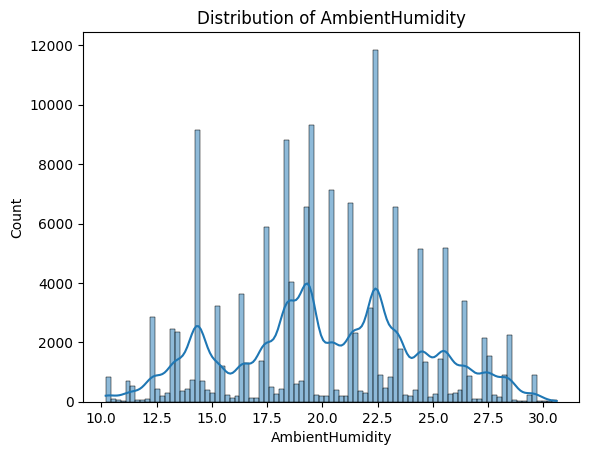

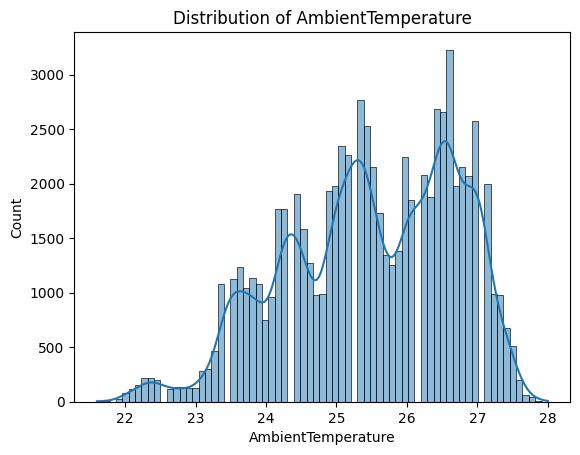

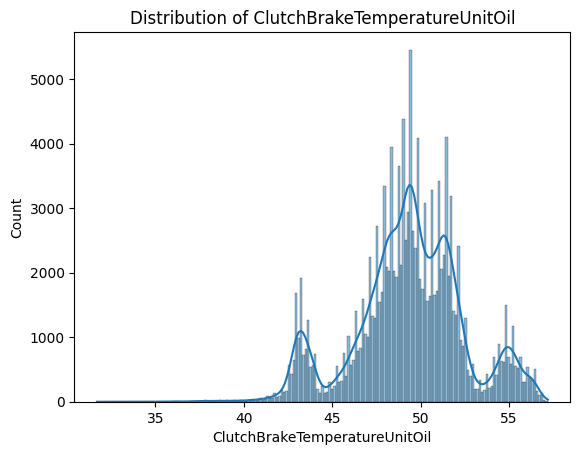

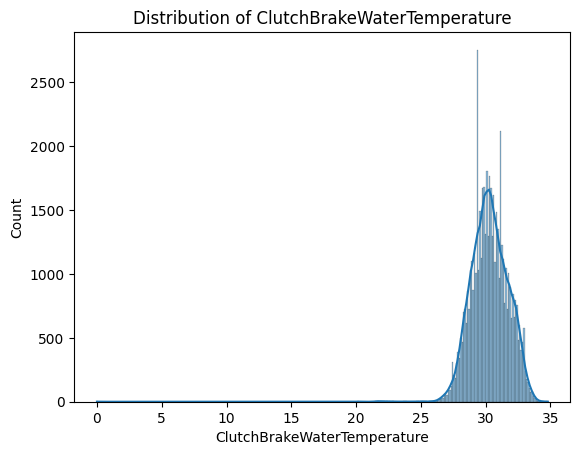

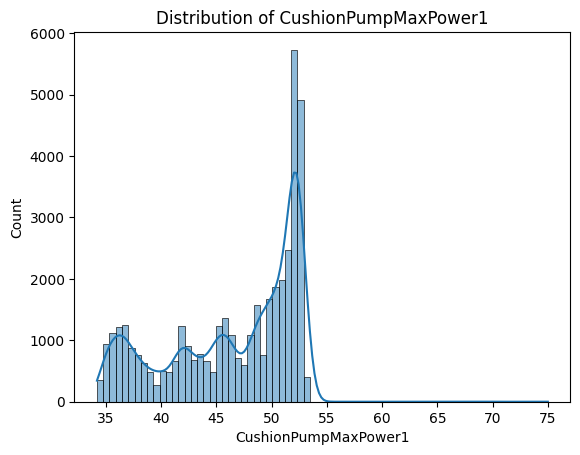

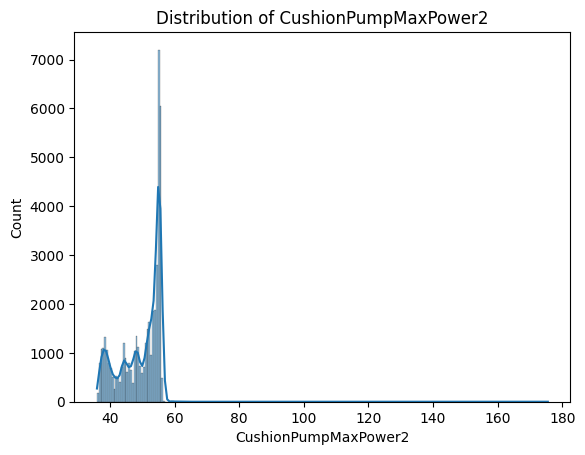

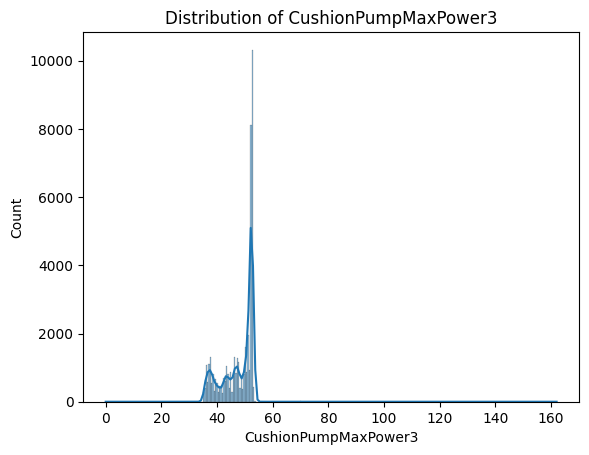

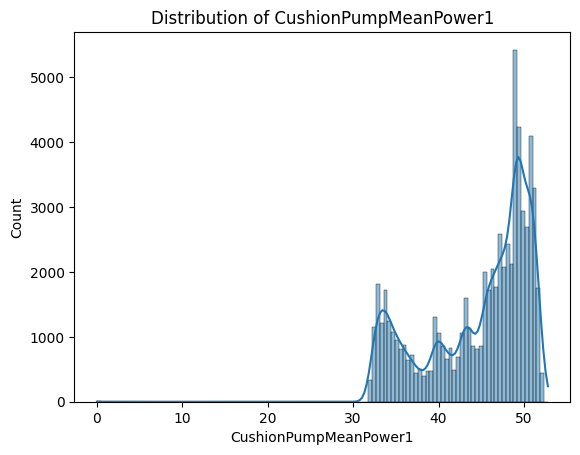

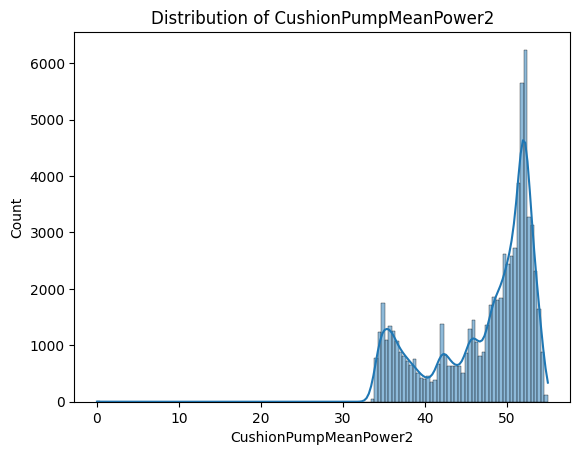

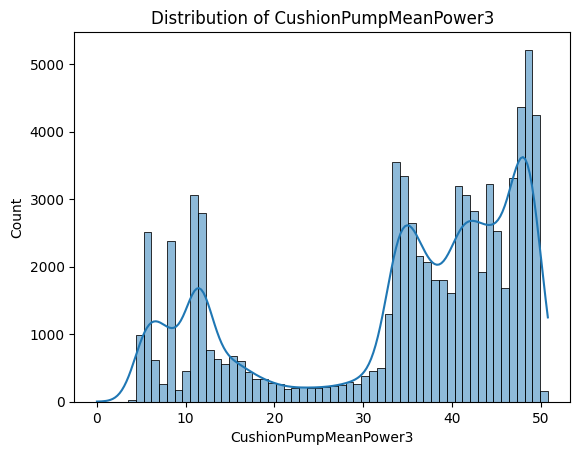

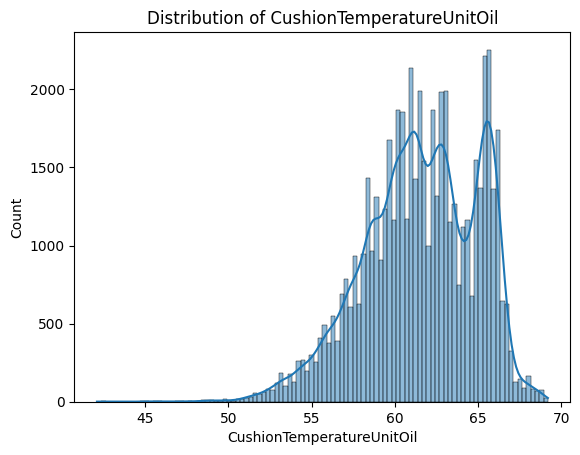

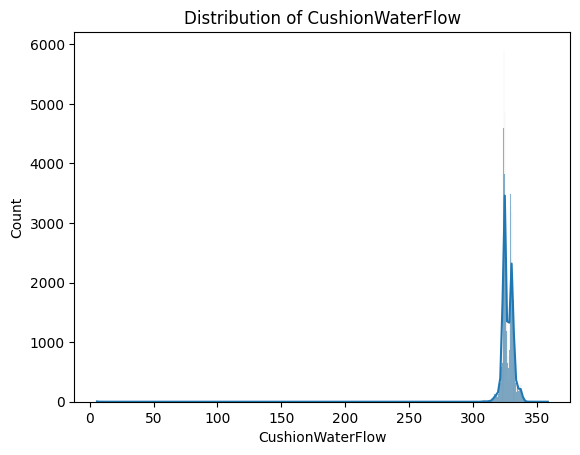

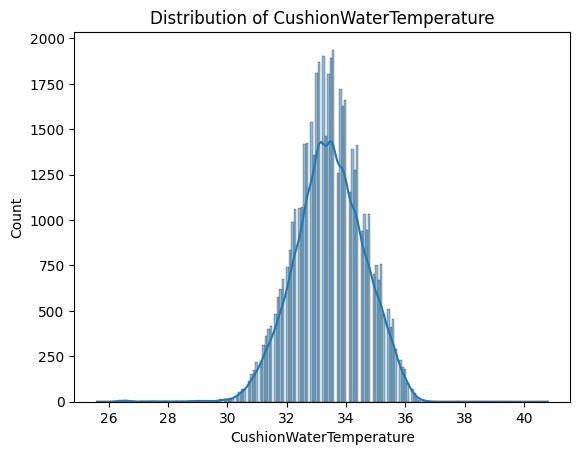

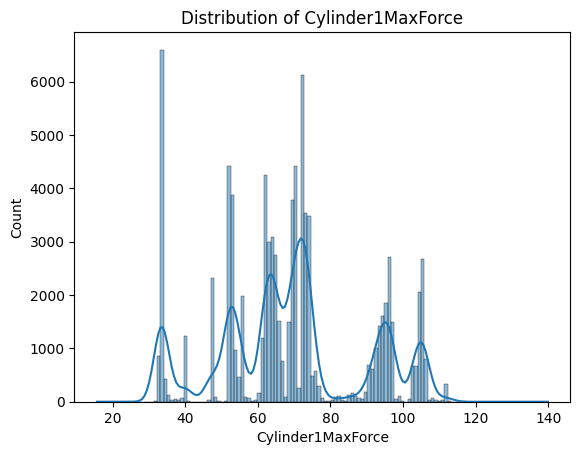

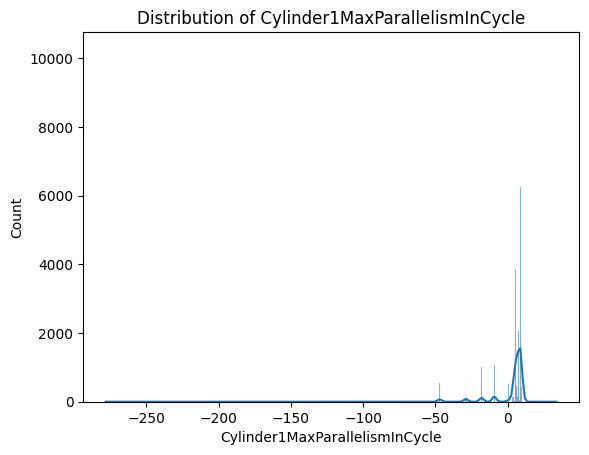

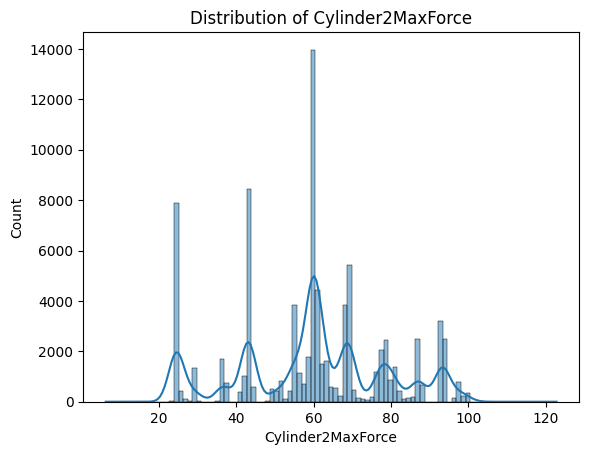

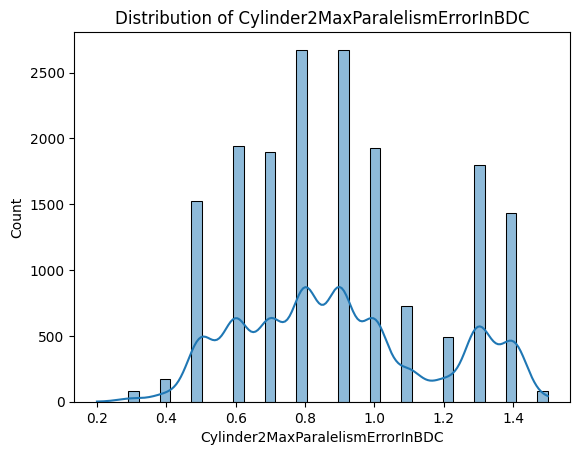

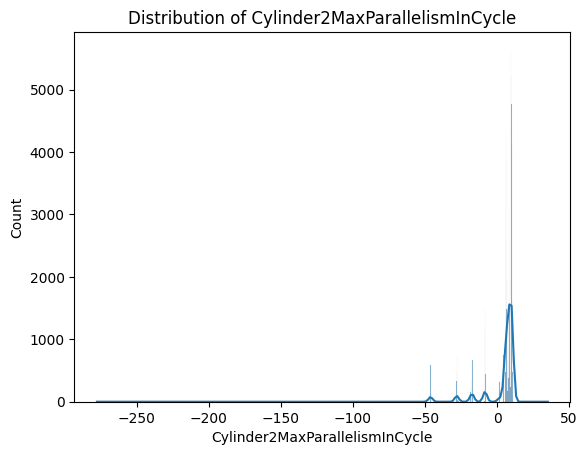

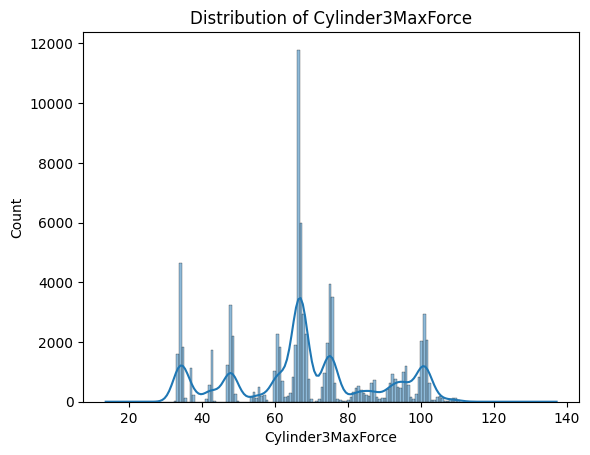

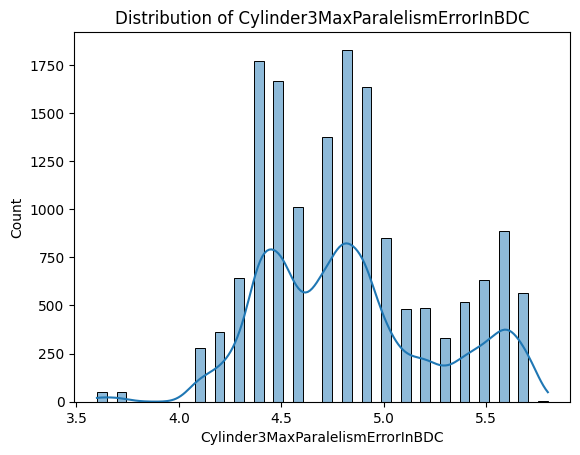

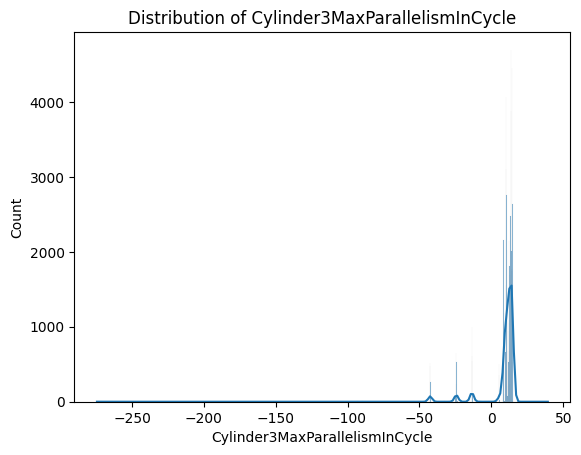

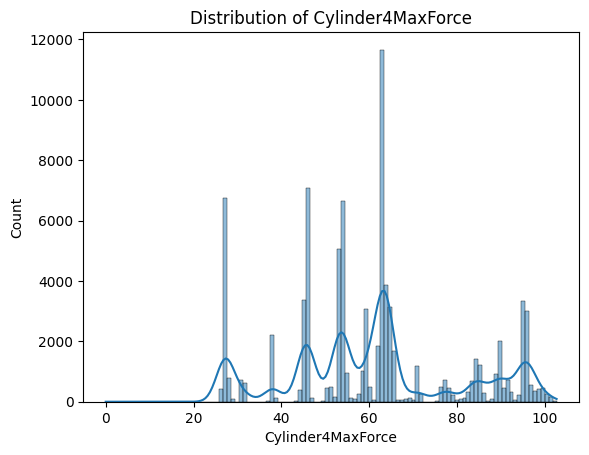

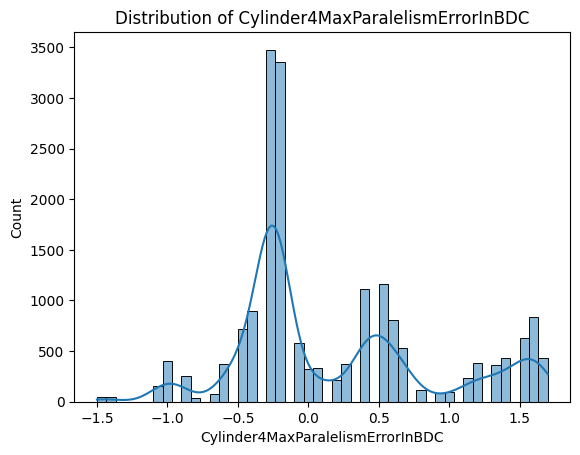

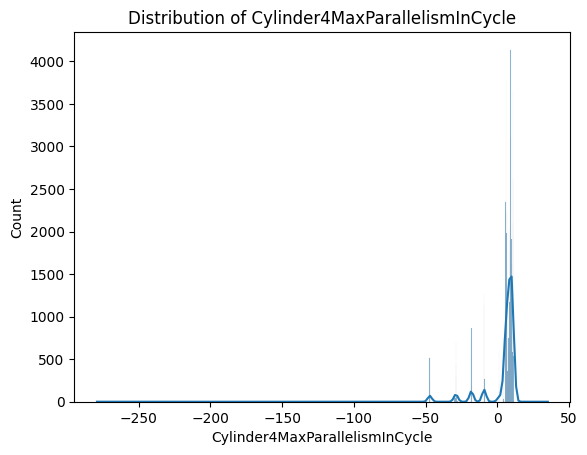

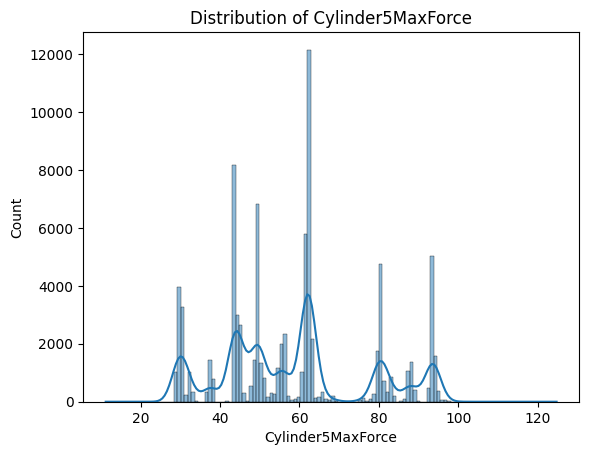

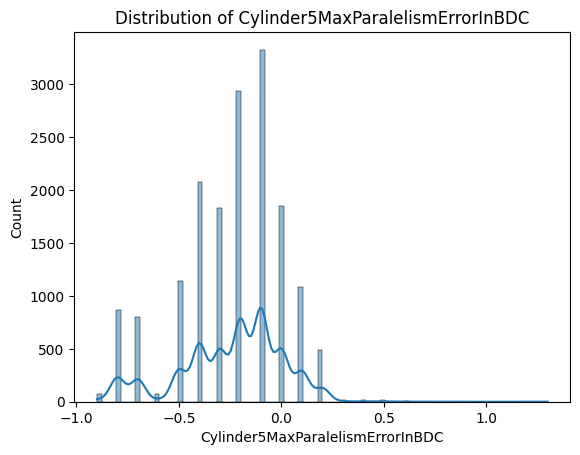

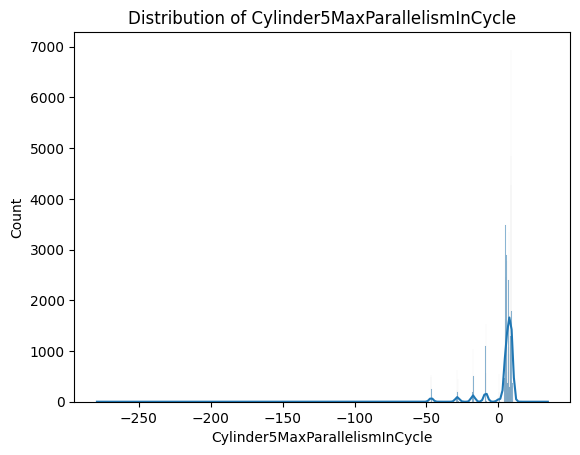

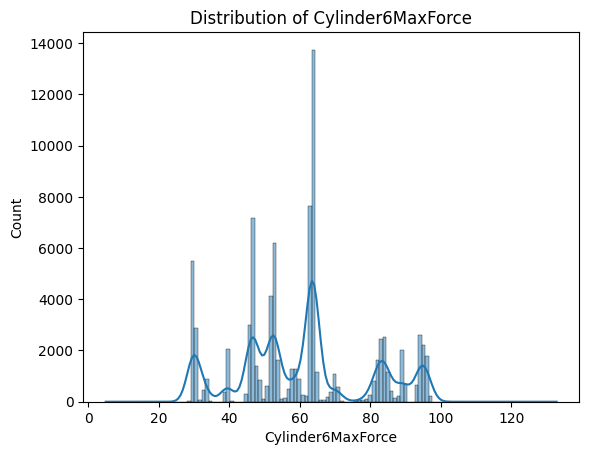

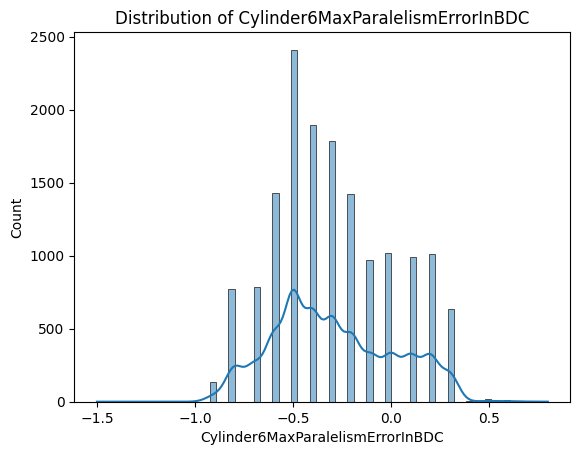

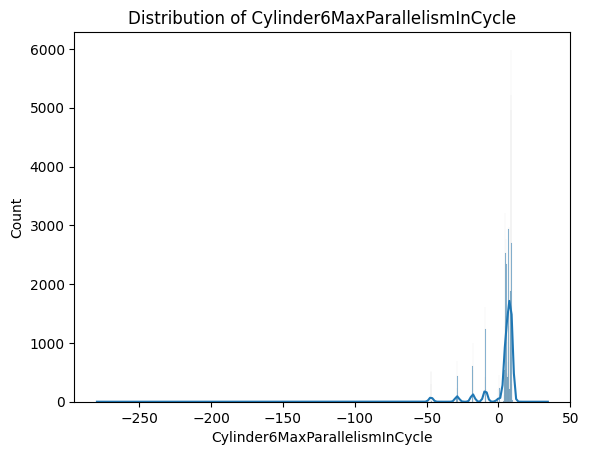

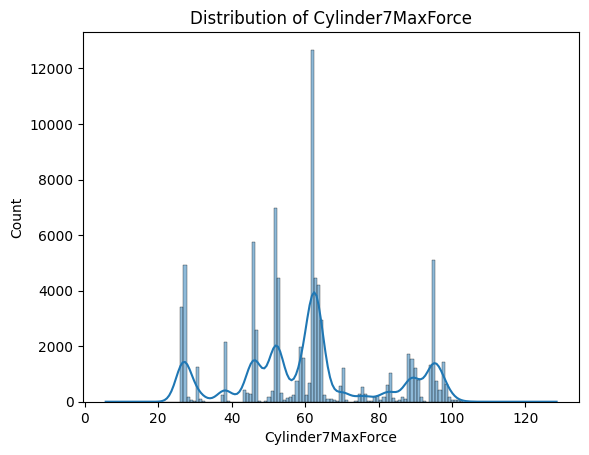

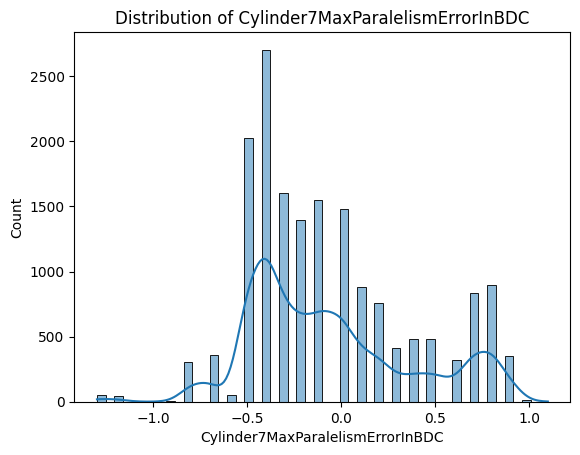

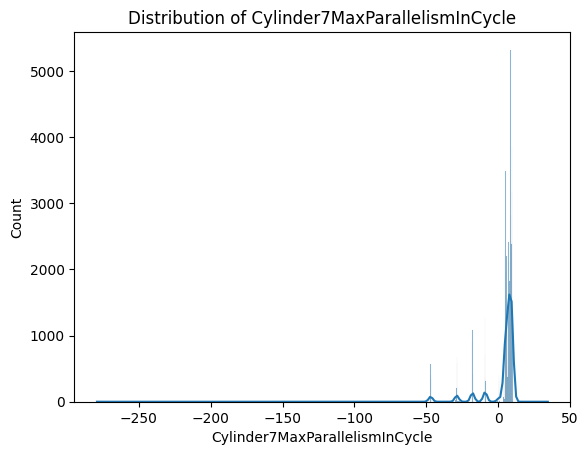

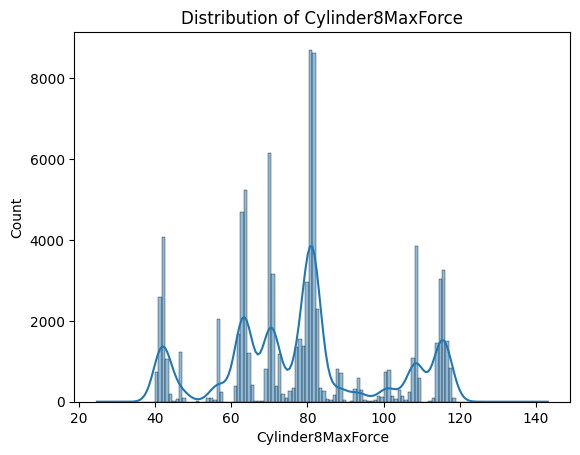

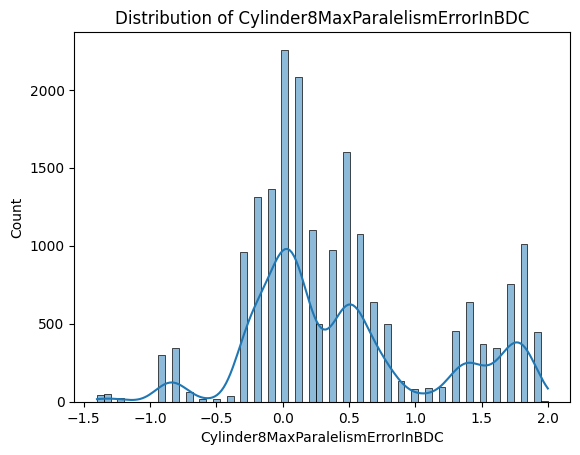

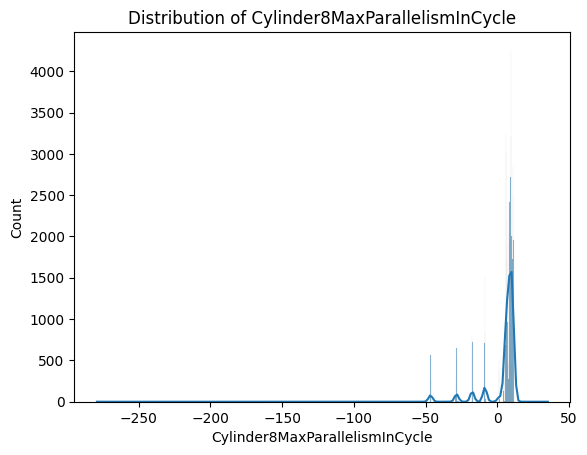

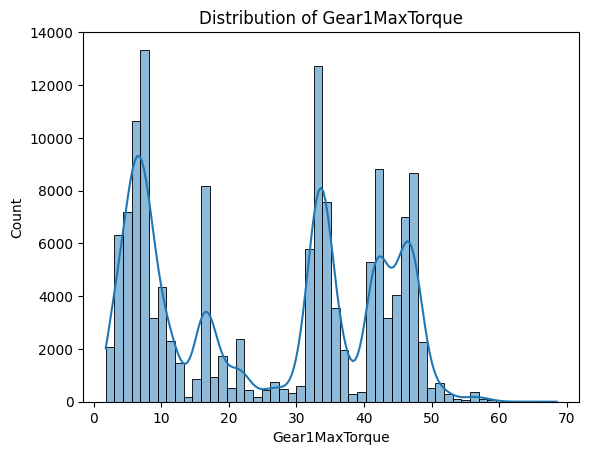

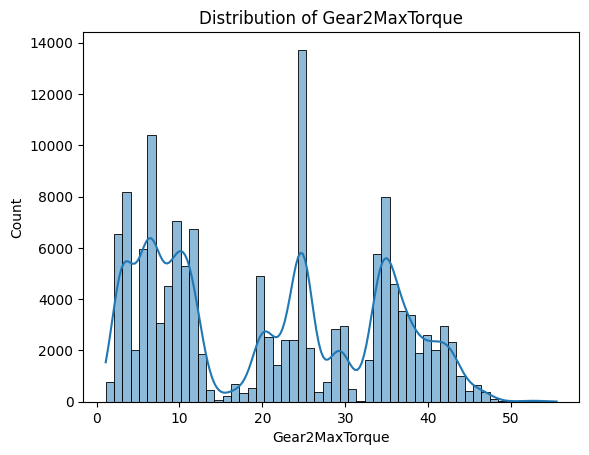

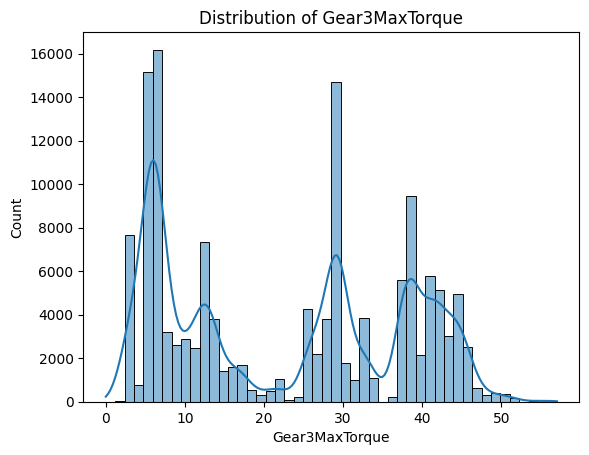

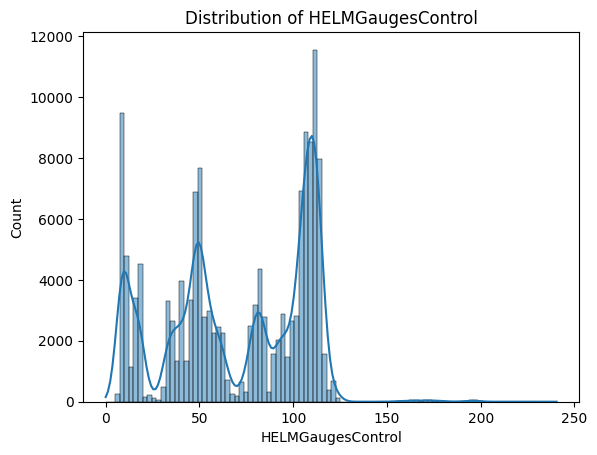

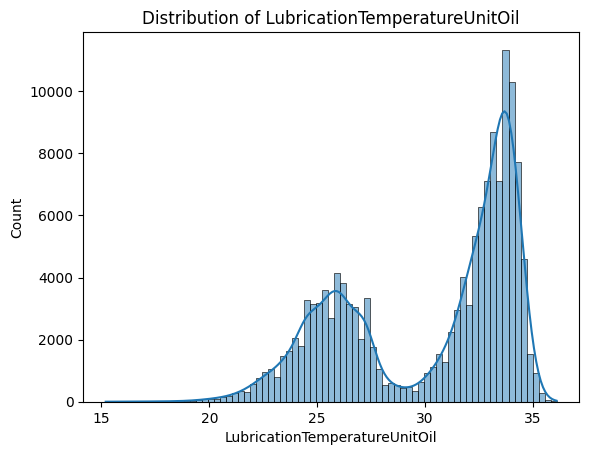

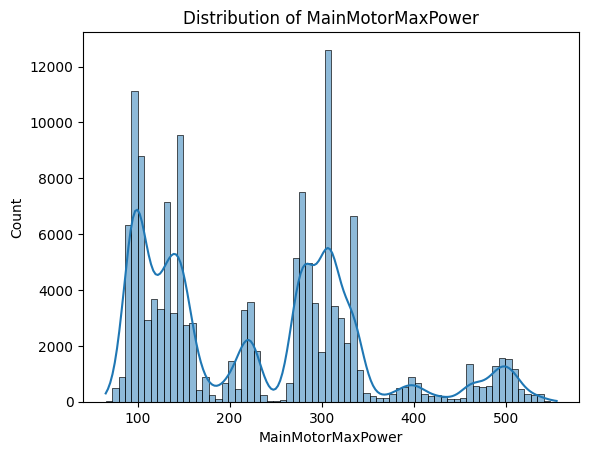

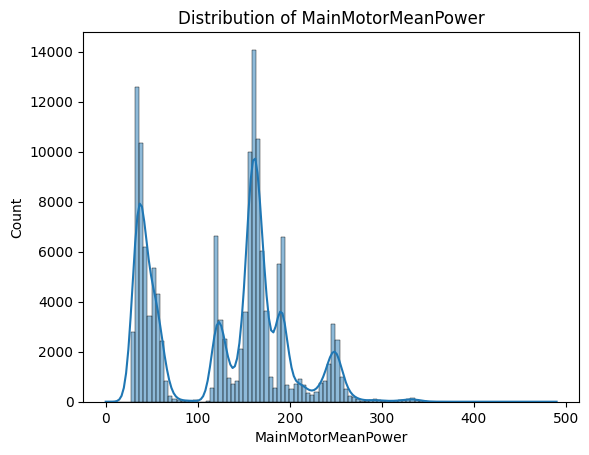

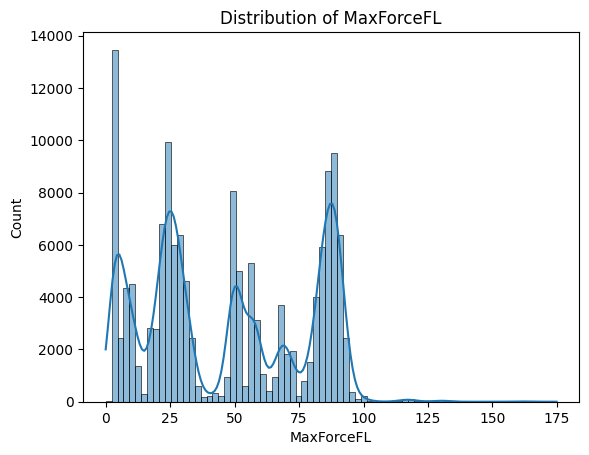

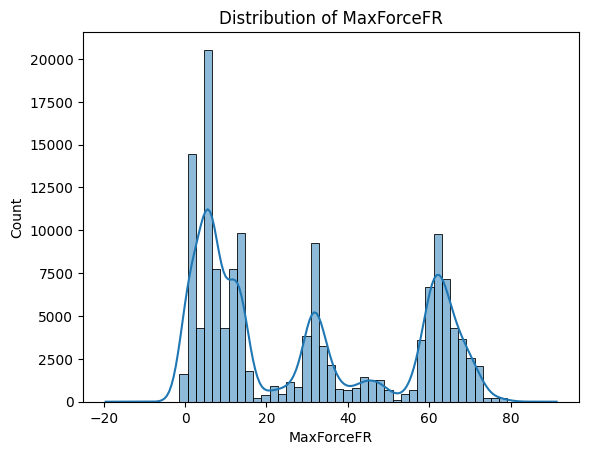

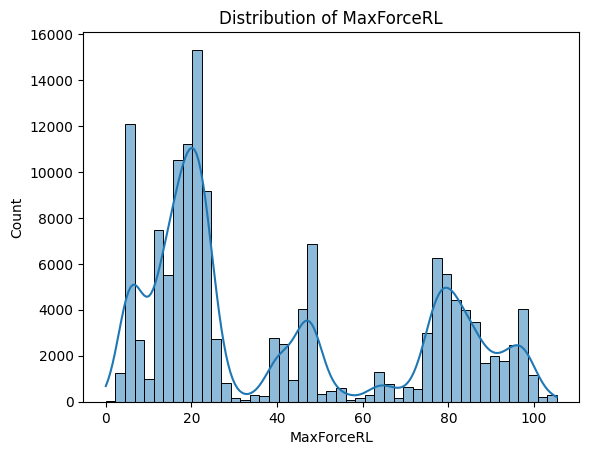

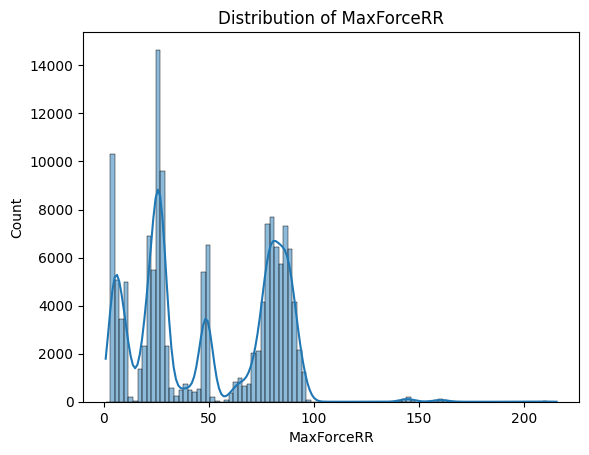

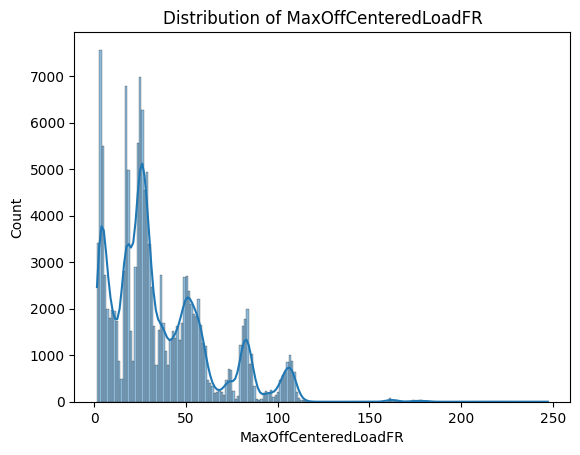

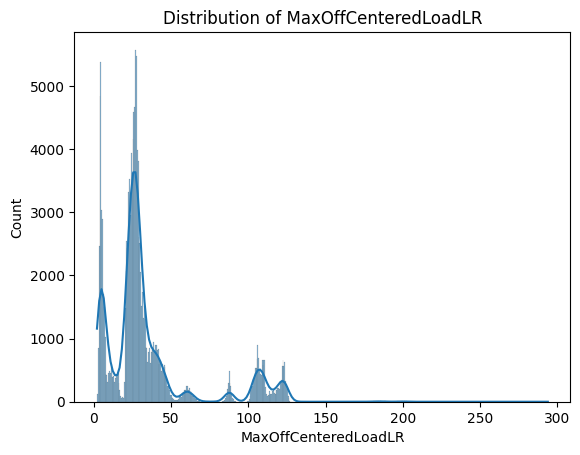

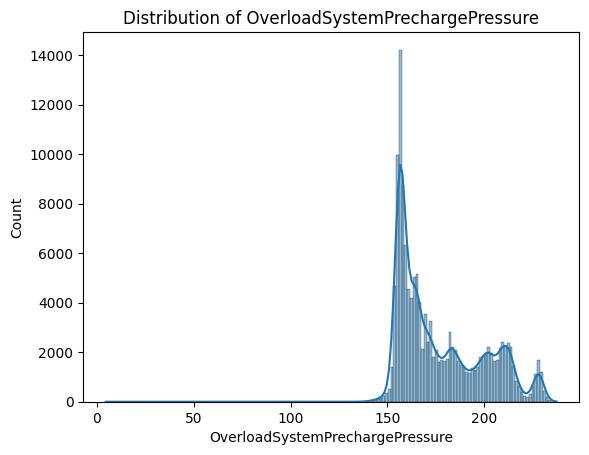

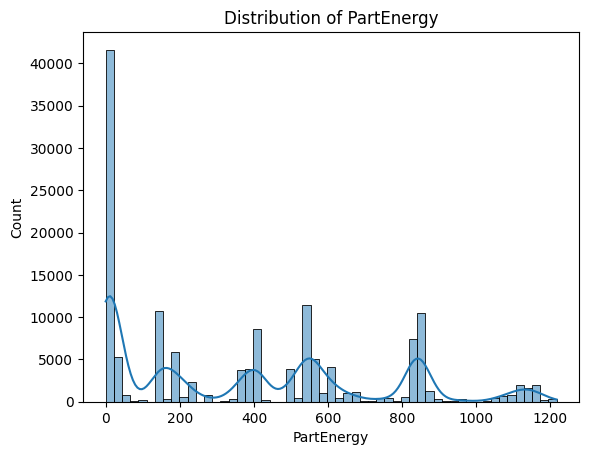

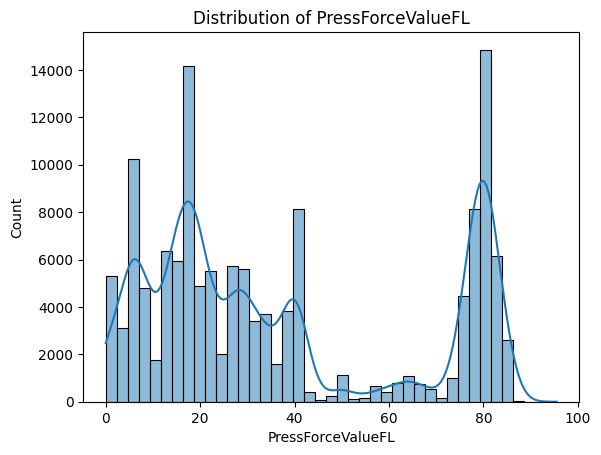

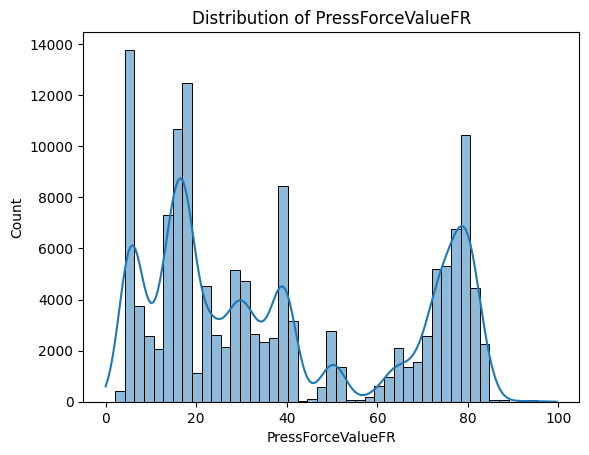

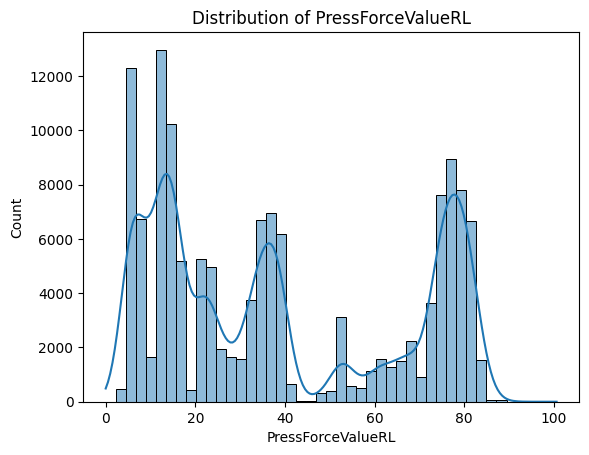

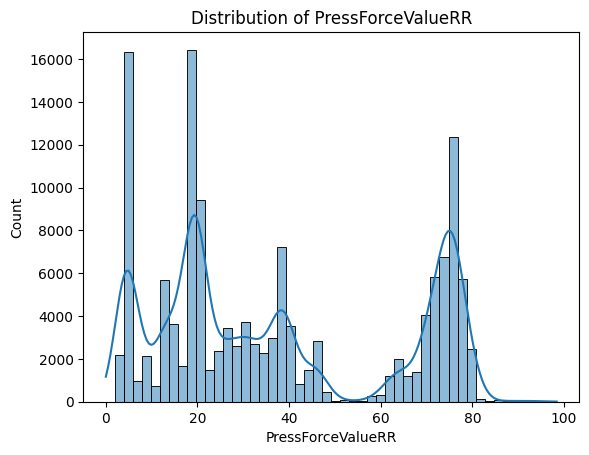

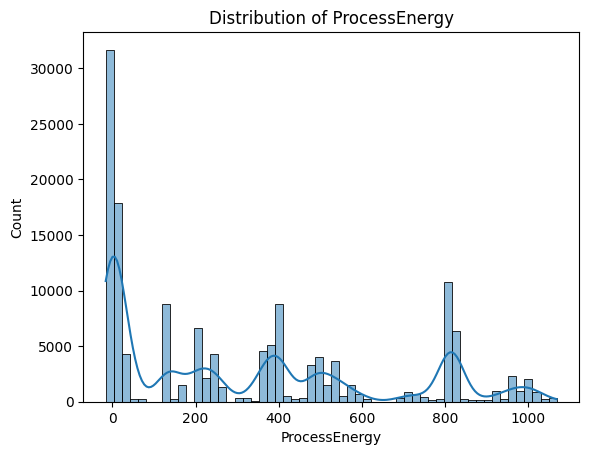

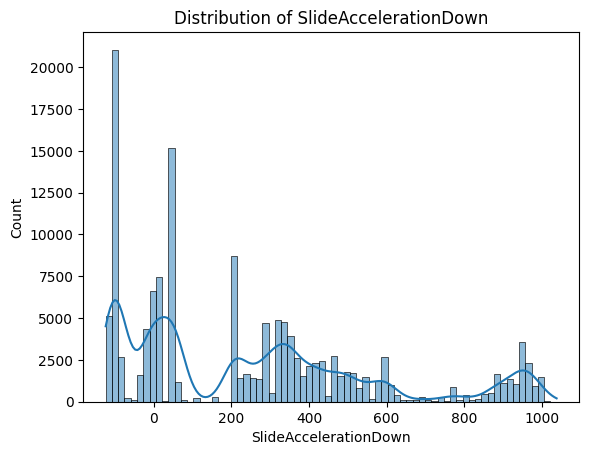

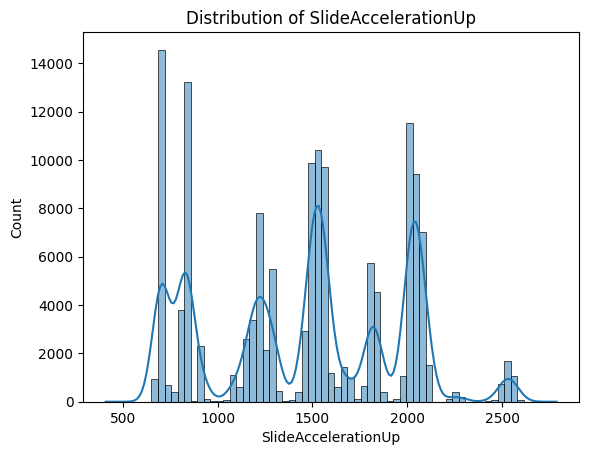

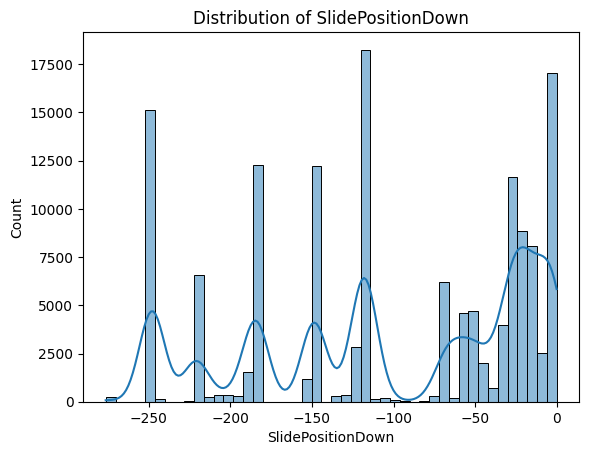

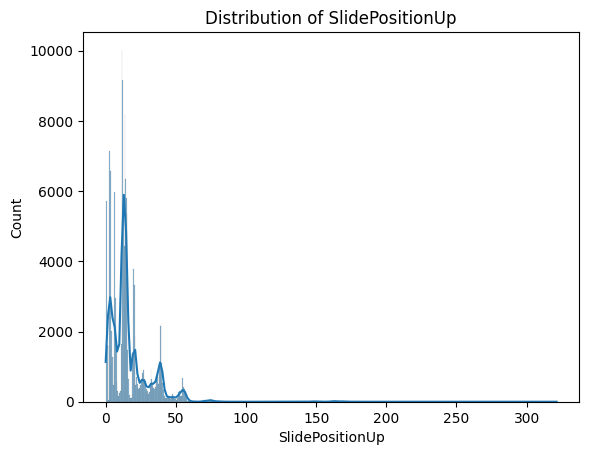

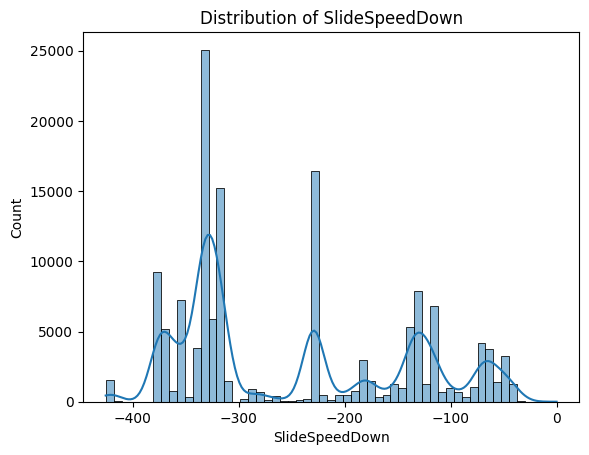

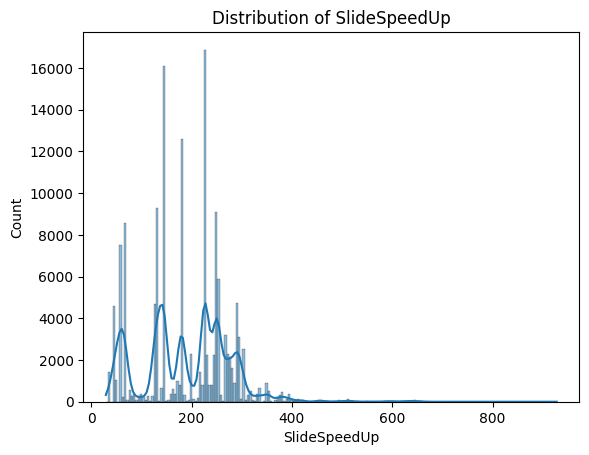

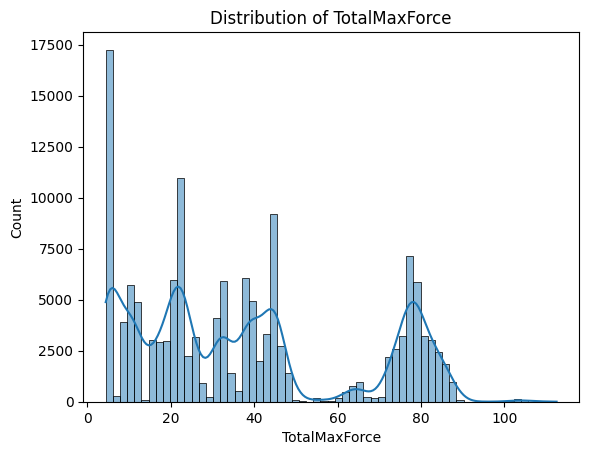

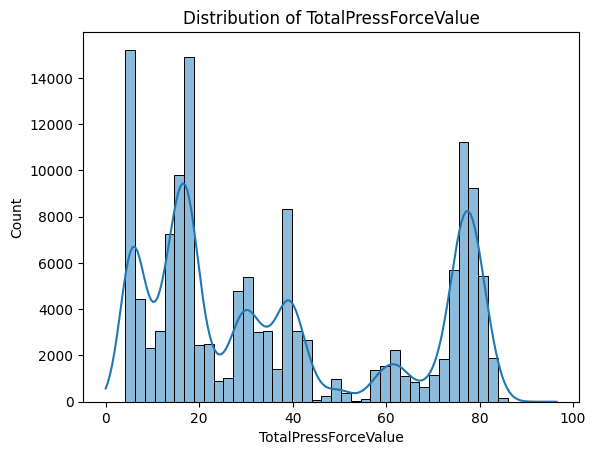

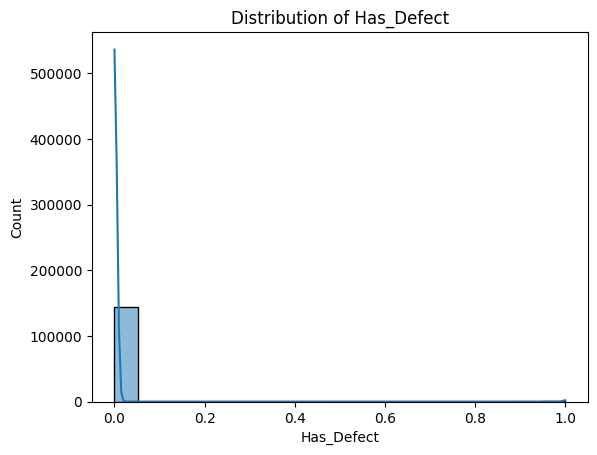

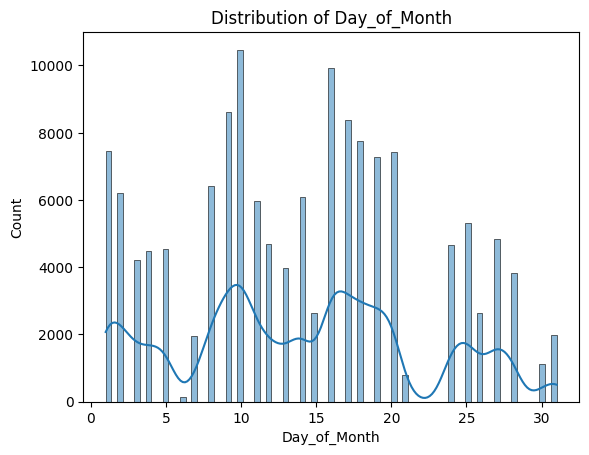

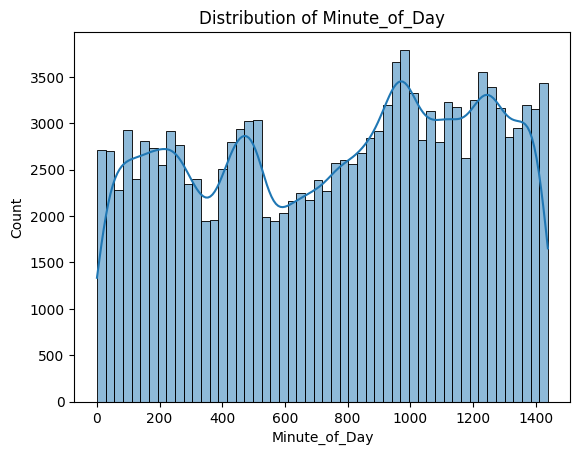

In [34]:
import seaborn as sns

# Select the float columns in the DataFrame
float_columns = df_merged_new.select_dtypes(include='float').columns

# Plot the distributions
for column in float_columns:
    sns.histplot(data=df_merged_new, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.show() 

### Let's analyze skewness

In [35]:
for column in df_merged_new.select_dtypes('float64'):
    print(f"{column}: {df_merged_new[column].skew()}")

AmbientHumidity: -0.03560151200530158
AmbientTemperature: -0.4191814698761531
ClutchBrakeTemperatureUnitOil: -0.24504078062645912
ClutchBrakeWaterTemperature: -0.563217663592564
CushionPumpMaxPower1: -0.616576726179526
CushionPumpMaxPower2: -0.557147799807483
CushionPumpMaxPower3: -0.6402541109222333
CushionPumpMeanPower1: -0.7873001245675255
CushionPumpMeanPower2: -0.8988147911834434
CushionPumpMeanPower3: -0.855735911774285
CushionTemperatureUnitOil: -0.46542045835441687
CushionWaterFlow: -28.243949951152878
CushionWaterTemperature: -0.27938891529029775
Cylinder1MaxForce: 0.14220993604771628
Cylinder1MaxParallelismInCycle: -5.089367316227075
Cylinder2MaxForce: -0.093732031357368
Cylinder2MaxParalelismErrorInBDC: 0.3338473401703653
Cylinder2MaxParallelismInCycle: -4.759261577725194
Cylinder3MaxForce: 0.006281057404474482
Cylinder3MaxParalelismErrorInBDC: 0.40455938543503783
Cylinder3MaxParallelismInCycle: -5.609931400962579
Cylinder4MaxForce: 0.22967432869690793
Cylinder4MaxParalelism

### Outliers detection

In [36]:
# Define a function to detect outliers in a column
def detect_outliers(dataframe, column, threshold=1.5):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - threshold * iqr
    upper_fence = q3 + threshold * iqr
    outliers = dataframe.loc[(dataframe[column] < lower_fence) | (dataframe[column] > upper_fence)]
    return outliers

outliers_list = []

# Iterate over float columns in the DataFrame
for column in df_merged_new.select_dtypes(include='float64').columns:
    outliers = detect_outliers(df_merged_new, column)
    outliers_list.append(outliers)

# Concatenate the outliers for all columns into a single DataFrame
all_outliers = pd.concat(outliers_list)

# Print the count and details of outliers for each column
for i, column in enumerate(df_merged_new.select_dtypes(include='float64').columns):
    column_outliers = outliers_list[i]
    print(f"Outliers in column '{column}':")
    print(column_outliers)
    print(f"Total count: {column_outliers.shape[0]}\n")

# Print the count and details of all outliers across columns
print("All outliers:")
print(all_outliers)
print(f"Total count: {all_outliers.shape[0]}")

Outliers in column 'AmbientHumidity':
Empty DataFrame
Columns: [AmbientHumidity, AmbientTemperature, ClutchBrakeTemperatureUnitOil, ClutchBrakeWaterTemperature, CushionPumpMaxPower1, CushionPumpMaxPower2, CushionPumpMaxPower3, CushionPumpMeanPower1, CushionPumpMeanPower2, CushionPumpMeanPower3, CushionTemperatureUnitOil, CushionWaterFlow, CushionWaterTemperature, Cylinder1MaxForce, Cylinder1MaxParallelismInCycle, Cylinder2MaxForce, Cylinder2MaxParalelismErrorInBDC, Cylinder2MaxParallelismInCycle, Cylinder3MaxForce, Cylinder3MaxParalelismErrorInBDC, Cylinder3MaxParallelismInCycle, Cylinder4MaxForce, Cylinder4MaxParalelismErrorInBDC, Cylinder4MaxParallelismInCycle, Cylinder5MaxForce, Cylinder5MaxParalelismErrorInBDC, Cylinder5MaxParallelismInCycle, Cylinder6MaxForce, Cylinder6MaxParalelismErrorInBDC, Cylinder6MaxParallelismInCycle, Cylinder7MaxForce, Cylinder7MaxParalelismErrorInBDC, Cylinder7MaxParallelismInCycle, Cylinder8MaxForce, Cylinder8MaxParalelismErrorInBDC, Cylinder8MaxParallel

## Bivariate Analysis:

### Correlation matrix:

/var/folders/xq/n_q5kmh104s270y6h09wrhtc0000gn/T/ipykernel_24316/74330079.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  col = df_merged_new.corr().nlargest(20, "Has_Defect").Has_Defect.index


<Axes: >

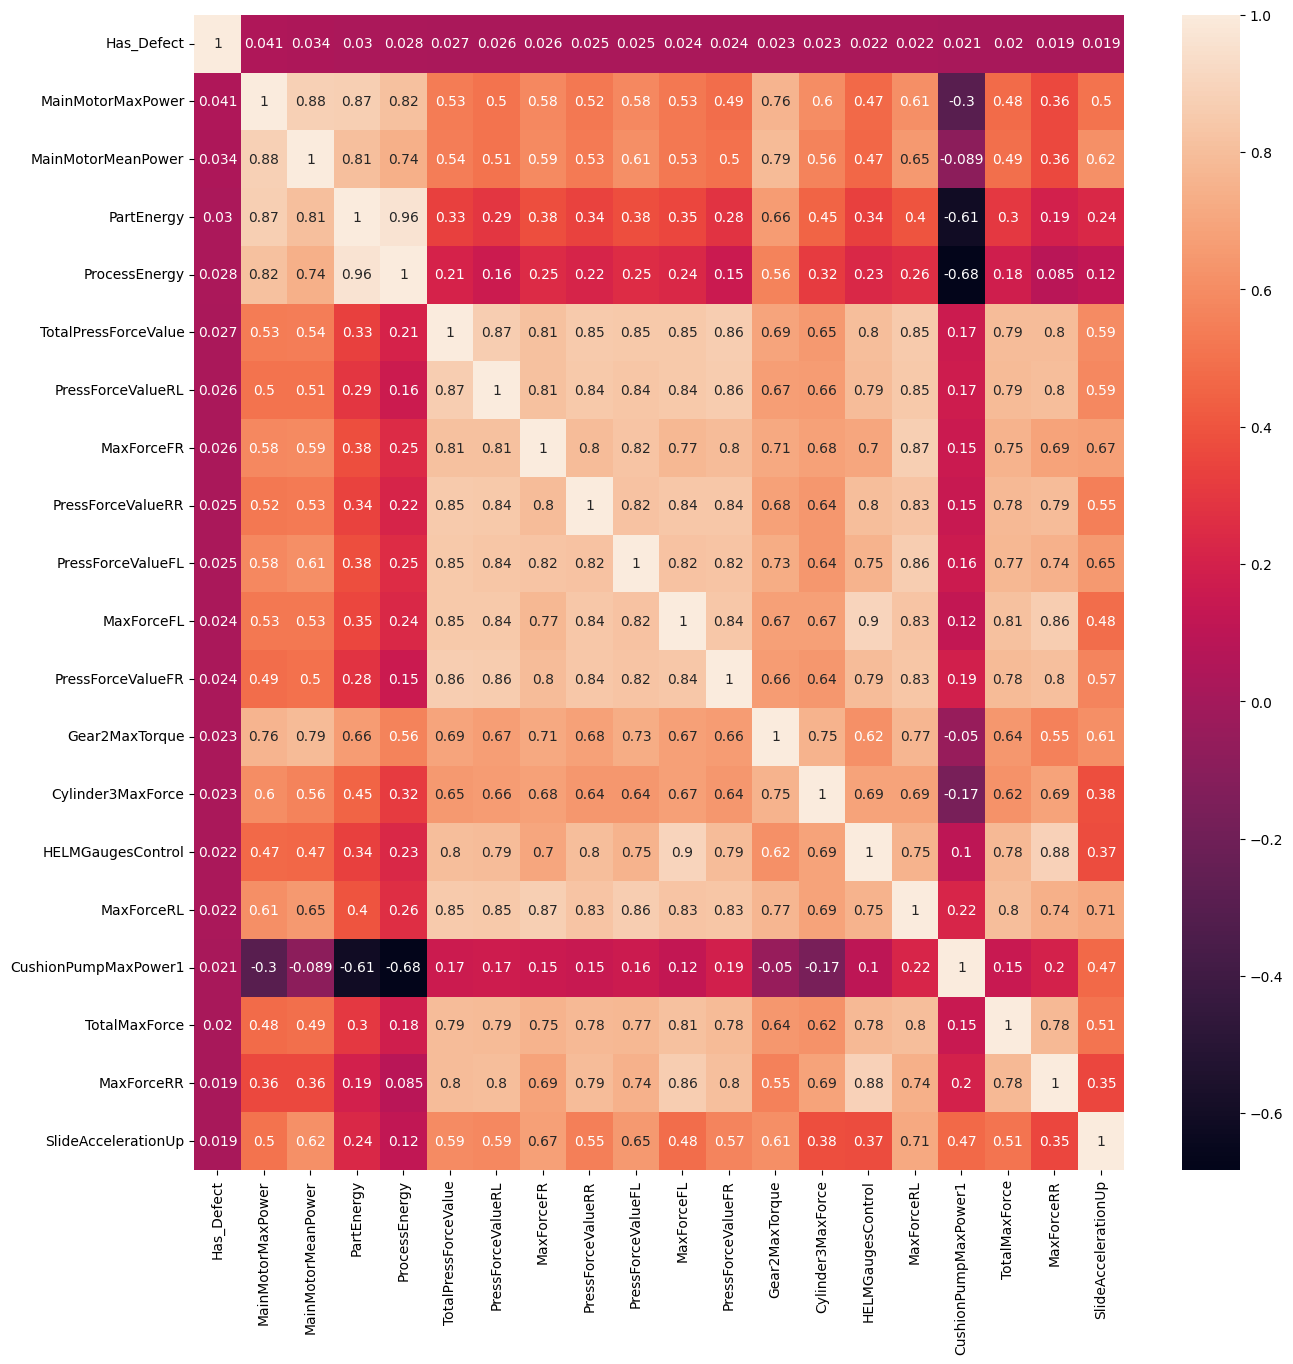

In [37]:
import seaborn as sns
col = df_merged_new.corr().nlargest(20, "Has_Defect").Has_Defect.index
plt.figure(figsize=(15, 15))
sns.heatmap(df_merged_new[col].corr(), annot=True, annot_kws={"size":10})

- Some correlated features
- We use this in our feature engineering

### We want to see the relationship between some variables and the target variable, has defect

### Ambient Humidity:

In [38]:
df_merged_new['AmbientHumidity'].value_counts()

22.4    8873
19.4    6712
18.4    6352
19.3    5983
21.4    5058
        ... 
30.6      10
30.2       9
28.8       8
30.1       7
28.9       7
Name: AmbientHumidity, Length: 205, dtype: int64

In [39]:
df_merged_new['AmbientHumidity'].nunique()

205

Text(0.5, 1.0, 'number of defected parts per ambient humidity')

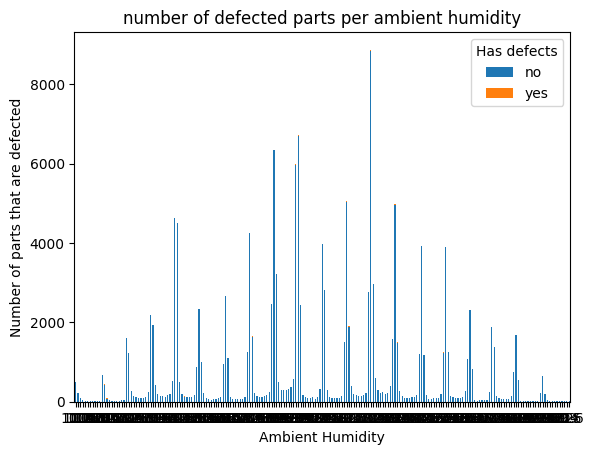

In [40]:
AmbientHumidity = pd.crosstab(df_merged_new["AmbientHumidity"], df_merged_new["Has_Defect"])
AmbientHumidity.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Ambient Humidity")
plt.ylabel("Number of parts that are defected")
plt.legend(title="Has defects", labels=["no", "yes"])
plt.title("number of defected parts per ambient humidity")

In [41]:
AmbientHumidity ["perc"] = (AmbientHumidity[1] / (AmbientHumidity[0] + AmbientHumidity[1]))*100
AmbientHumidity

Has_Defect       0.0  1.0      perc
AmbientHumidity                    
10.2             500    1  0.199601
10.3             218    0  0.000000
10.4             102    0  0.000000
10.5              50    0  0.000000
10.6              25    0  0.000000
...              ...  ...       ...
30.2               9    0  0.000000
30.3              16    0  0.000000
30.4              15    0  0.000000
30.5              24    0  0.000000
30.6              10    0  0.000000

[205 rows x 3 columns]

### Ambient Temperature

In [42]:
df_merged_new['AmbientTemperature'].value_counts()

26.6    3228
25.3    2767
26.4    2684
26.5    2655
27.0    2572
        ... 
27.9       9
21.6       7
21.7       6
28.0       1
21.8       1
Name: AmbientTemperature, Length: 65, dtype: int64

In [43]:
df_merged_new['AmbientTemperature'].nunique()

65

Text(0.5, 1.0, 'number of defected parts per ambient temperature')

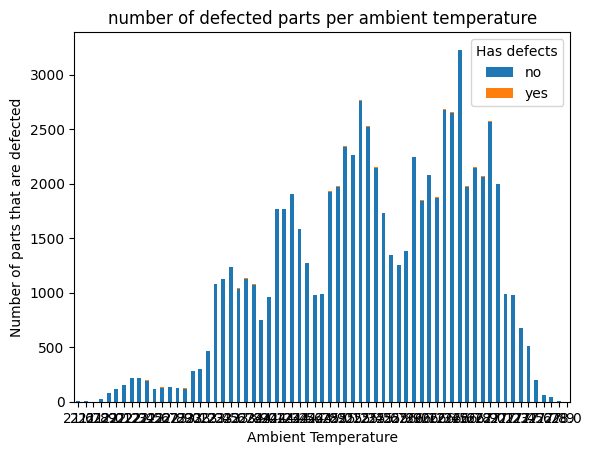

In [44]:
AmbientTemperature = pd.crosstab(df_merged_new["AmbientTemperature"], df_merged_new["Has_Defect"])
AmbientTemperature.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Ambient Temperature")
plt.ylabel("Number of parts that are defected")
plt.legend(title="Has defects", labels=["no", "yes"])
plt.title("number of defected parts per ambient temperature")

In [45]:
AmbientTemperature ["perc"] = (AmbientTemperature[1] / (AmbientTemperature[0] + AmbientTemperature[1]))*100
AmbientTemperature

Has_Defect          0.0  1.0  perc
AmbientTemperature                
21.6                  7    0   0.0
21.7                  6    0   0.0
21.8                  1    0   0.0
21.9                 24    0   0.0
22.0                 83    0   0.0
...                 ...  ...   ...
27.6                196    0   0.0
27.7                 65    0   0.0
27.8                 42    0   0.0
27.9                  9    0   0.0
28.0                  1    0   0.0

[65 rows x 3 columns]

In [46]:
df_merged_new

AmbientHumidity  AmbientTemperature  \
TraceabilityCode                                        
1010122318135217              NaN                 NaN   
1010122318135259              NaN                 NaN   
1010122318135412              NaN                 NaN   
1010122318141922              NaN                 NaN   
1010122319141031              NaN                 NaN   
...                           ...                 ...   
1012623048222115              NaN                 NaN   
1012723011144348              NaN                 NaN   
1012723011145624              NaN                 NaN   
1012823068072827              NaN                 NaN   
1012823068073134              NaN                 NaN   

                  ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
TraceabilityCode                                                               
1010122318135217                            NaN                          NaN   
1010122318135259                            NaN                          NaN   
1010122318135412                            NaN                          NaN   
1010122318141922                            NaN                          NaN   
1010122319141031                            NaN                          NaN   
...                                         ...                          ...   
1012623048222115                           45.1                          NaN   
1012723011144348                            NaN                          NaN   
1012723011145624                            NaN                          NaN   
1012823068072827                            NaN                          NaN   
1012823068073134                            NaN                          NaN   

                  CushionPumpMaxPower1  CushionPumpMaxPower2  \
TraceabilityCode                                               
1010122318135217                   NaN                   NaN   
1010122318135259                   NaN                   NaN   
1010122318135412                   NaN                   NaN   
1010122318141922                   NaN                   NaN   
1010122319141031                   NaN                   NaN   
...                                ...                   ...   
1012623048222115                   NaN                   NaN   
1012723011144348                   NaN                   NaN   
1012723011145624                   NaN                   NaN   
1012823068072827                   NaN                   NaN   
1012823068073134                   NaN                   NaN   

                  CushionPumpMaxPower3  CushionPumpMeanPower1  \
TraceabilityCode                                                
1010122318135217                   NaN                    NaN   
1010122318135259                   NaN                    NaN   
1010122318135412                   NaN                    NaN   
1010122318141922                   NaN                    NaN   
1010122319141031                   NaN                    NaN   
...                                ...                    ...   
1012623048222115                   NaN                    NaN   
1012723011144348                   NaN                    NaN   
1012723011145624                   NaN                    NaN   
1012823068072827                   NaN                    NaN   
1012823068073134                   NaN                    NaN   

                  CushionPumpMeanPower2  CushionPumpMeanPower3  ...  \
TraceabilityCode                                                ...   
1010122318135217                    NaN                    NaN  ...   
1010122318135259                    NaN                    NaN  ...   
1010122318135412                    NaN                    NaN  ...   
1010122318141922                    NaN                    NaN  ...   
1010122319141031                    NaN                    NaN  ...   
...                                 ...                    

### ClutchBrakeTemperatureUnitOil:

In [47]:
df_merged_new['ClutchBrakeTemperatureUnitOil'].value_counts()

49.3    2937
49.4    2782
49.5    2672
49.6    2638
49.2    2507
        ... 
31.7       1
34.8       1
33.9       1
34.7       1
36.7       1
Name: ClutchBrakeTemperatureUnitOil, Length: 225, dtype: int64

In [48]:
df_merged_new['ClutchBrakeTemperatureUnitOil'].nunique()

225

Text(0.5, 1.0, 'number of defected parts per ClutchBrakeTemperatureUnitOil')

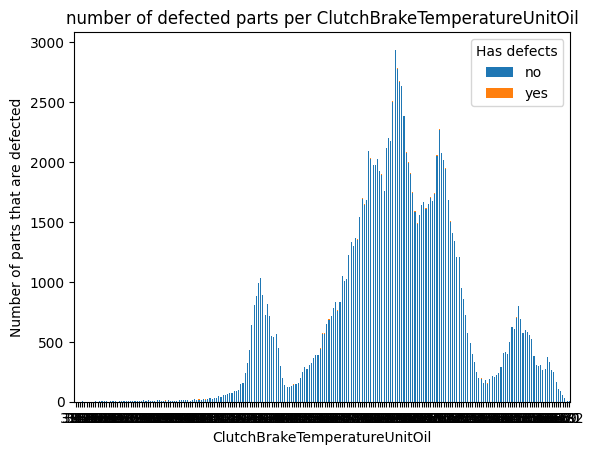

In [49]:
ClutchBrakeTemperatureUnitOil = pd.crosstab(df_merged_new["ClutchBrakeTemperatureUnitOil"], df_merged_new["Has_Defect"])
ClutchBrakeTemperatureUnitOil.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("ClutchBrakeTemperatureUnitOil")
plt.ylabel("Number of parts that are defected")
plt.legend(title="Has defects", labels=["no", "yes"])
plt.title("number of defected parts per ClutchBrakeTemperatureUnitOil")

In [50]:
ClutchBrakeTemperatureUnitOil ["perc"] = (ClutchBrakeTemperatureUnitOil[1] / (ClutchBrakeTemperatureUnitOil[0] + ClutchBrakeTemperatureUnitOil[1]))*100
ClutchBrakeTemperatureUnitOil

Has_Defect                     0.0  1.0  perc
ClutchBrakeTemperatureUnitOil                
31.7                             1    0   0.0
33.9                             1    0   0.0
34.0                             1    0   0.0
34.1                             2    0   0.0
34.4                             1    0   0.0
...                            ...  ...   ...
56.8                            86    0   0.0
56.9                            55    0   0.0
57.0                            29    0   0.0
57.1                            10    0   0.0
57.2                             2    0   0.0

[225 rows x 3 columns]

### Cylinder3MaxParallelismInCycle:

In [51]:
df_merged_new['Cylinder3MaxParallelismInCycle'].value_counts()

 13.6     2358
 13.5     2339
 14.4     2232
 14.5     2226
 10.1     2135
          ... 
-93.5        1
-50.0        1
-274.4       1
-89.5        1
-32.2        1
Name: Cylinder3MaxParallelismInCycle, Length: 171, dtype: int64

In [52]:
df_merged_new['Cylinder3MaxParallelismInCycle'].nunique()

171

Text(0.5, 1.0, 'number of defected parts per Cylinder3MaxParallelismInCycle')

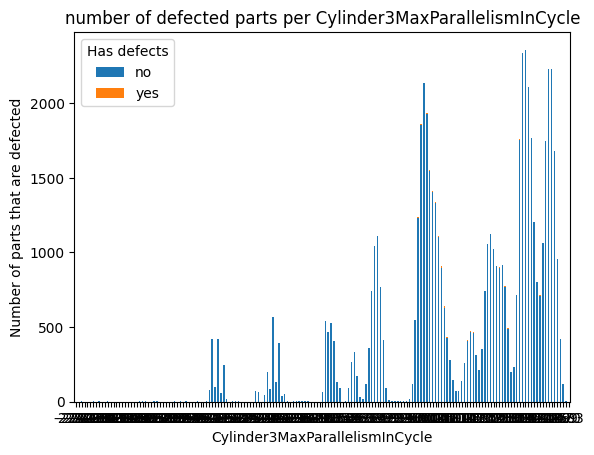

In [53]:
Cylinder3MaxParallelismInCycle = pd.crosstab(df_merged_new["Cylinder3MaxParallelismInCycle"], df_merged_new["Has_Defect"])
Cylinder3MaxParallelismInCycle.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Cylinder3MaxParallelismInCycle")
plt.ylabel("Number of parts that are defected")
plt.legend(title="Has defects", labels=["no", "yes"])
plt.title("number of defected parts per Cylinder3MaxParallelismInCycle")

In [54]:
Cylinder3MaxParallelismInCycle ["perc"] = (Cylinder3MaxParallelismInCycle[1] / (Cylinder3MaxParallelismInCycle[0] + Cylinder3MaxParallelismInCycle[1]))*100
Cylinder3MaxParallelismInCycle

Has_Defect                      0.0  1.0  perc
Cylinder3MaxParallelismInCycle                
-274.4                            1    0   0.0
-274.3                            1    0   0.0
-274.2                            2    0   0.0
-274.1                            1    0   0.0
-274.0                            1    0   0.0
...                             ...  ...   ...
 14.7                           958    0   0.0
 14.8                           417    0   0.0
 14.9                           117    0   0.0
 15.0                             8    0   0.0
 39.3                             1    0   0.0

[171 rows x 3 columns]

### Cylinder6MaxParallelismInCycle

In [55]:
df_merged_new['Cylinder6MaxParallelismInCycle'].value_counts()

 8.7     3090
 8.6     2958
 8.8     2897
 8.9     2692
 9.0     2278
         ... 
-77.5       1
-98.1       1
 34.4       1
-35.6       1
-35.1       1
Name: Cylinder6MaxParallelismInCycle, Length: 180, dtype: int64

In [56]:
df_merged_new['Cylinder6MaxParallelismInCycle'].nunique()

180

Text(0.5, 1.0, 'number of defected parts per Cylinder6MaxParallelismInCycle')

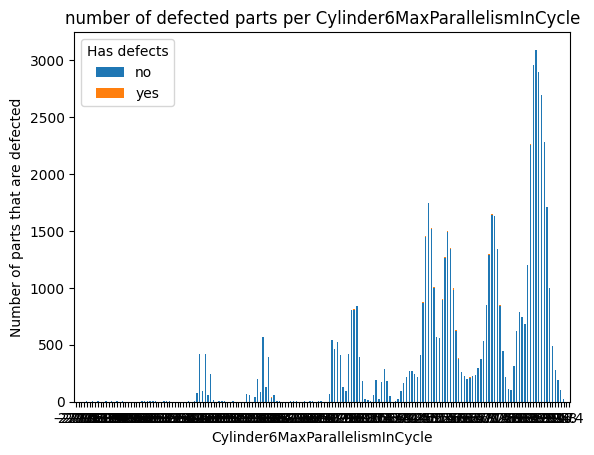

In [57]:
Cylinder6MaxParallelismInCycle = pd.crosstab(df_merged_new["Cylinder6MaxParallelismInCycle"], df_merged_new["Has_Defect"])
Cylinder6MaxParallelismInCycle.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Cylinder6MaxParallelismInCycle")
plt.ylabel("Number of parts that are defected")
plt.legend(title="Has defects", labels=["no", "yes"])
plt.title("number of defected parts per Cylinder6MaxParallelismInCycle")

In [58]:
Cylinder6MaxParallelismInCycle ["perc"] = (Cylinder6MaxParallelismInCycle[1] / (Cylinder6MaxParallelismInCycle[0] + Cylinder6MaxParallelismInCycle[1]))*100
Cylinder6MaxParallelismInCycle

Has_Defect                      0.0  1.0  perc
Cylinder6MaxParallelismInCycle                
-279.5                            1    0   0.0
-279.3                            1    0   0.0
-279.2                            1    0   0.0
-277.3                            1    0   0.0
-277.1                            2    0   0.0
...                             ...  ...   ...
 9.5                            193    0   0.0
 9.6                            102    0   0.0
 9.7                             20    0   0.0
 9.8                              1    0   0.0
 34.4                             1    0   0.0

[180 rows x 3 columns]

### Cylinder8MaxParallelismInCycle:

In [59]:
df_merged_new['Cylinder8MaxParallelismInCycle'].value_counts()

 9.5     2268
 9.6     1992
 9.4     1854
 6.0     1847
 5.9     1757
         ... 
-29.8       1
-93.0       1
-54.8       1
-93.7       1
-35.4       1
Name: Cylinder8MaxParallelismInCycle, Length: 192, dtype: int64

In [60]:
df_merged_new['Cylinder8MaxParallelismInCycle'].nunique()

192

Text(0.5, 1.0, 'number of defected parts per Cylinder8MaxParallelismInCycle')

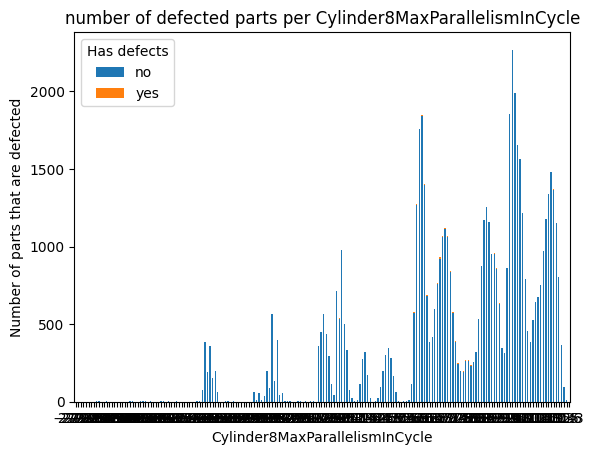

In [61]:
Cylinder8MaxParallelismInCycle = pd.crosstab(df_merged_new["Cylinder8MaxParallelismInCycle"], df_merged_new["Has_Defect"])
Cylinder8MaxParallelismInCycle.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("Cylinder8MaxParallelismInCycle")
plt.ylabel("Number of parts that are defected")
plt.legend(title="Has defects", labels=["no", "yes"])
plt.title("number of defected parts per Cylinder8MaxParallelismInCycle")

In [62]:
Cylinder8MaxParallelismInCycle ["perc"] = (Cylinder8MaxParallelismInCycle[1] / (Cylinder8MaxParallelismInCycle[0] + Cylinder8MaxParallelismInCycle[1]))*100
Cylinder8MaxParallelismInCycle

Has_Defect                      0.0  1.0  perc
Cylinder8MaxParallelismInCycle                
-279.2                            1    0   0.0
-279.1                            1    0   0.0
-279.0                            1    0   0.0
-277.8                            1    0   0.0
-277.4                            1    0   0.0
...                             ...  ...   ...
 11.3                           804    0   0.0
 11.4                           367    0   0.0
 11.5                            95    0   0.0
 11.6                            10    0   0.0
 35.3                             1    0   0.0

[192 rows x 3 columns]

4 out of the 5 unique values of Cylinder8MaxParallelismInCycle have parts with defects. All of them have less than 0.8% defected parts.

# 4. Feature Engineering


## We encode the date and time as cyclic features.

- We are trying to see how the date and thetime influence the target variable
- We use them as cyclic features so we don't give more weight to higher number dates/times
- We don't look at the year/month since we only have one year of data
    - Year will never repeat
    - If there was a problem in a month of 2023 doesn't mean there will be the same problem on the same month in 2024
- For time, we only use minutes (minute of the day = hour*60 + minute)
    - We use this value because there might be a pattern coming from the time

In [63]:
# Transform 'Day_of_Month' to cyclic encoding

# Calculate the sin and cos components of the cyclic encoding
sin_day = np.sin(2 * np.pi * df_merged_new['Day_of_Month'] / 31)
cos_day = np.cos(2 * np.pi * df_merged_new['Day_of_Month'] / 31)

# Create new columns for the cyclic encoding
df_merged_new['DayOfMonth_sin'] = sin_day
df_merged_new['DayOfMonth_cos'] = cos_day

# Drop the 'Day_of_Month' column
df_merged_new.drop(columns=['Day_of_Month'], inplace=True)

df_merged_new

AmbientHumidity  AmbientTemperature  \
TraceabilityCode                                        
1010122318135217              NaN                 NaN   
1010122318135259              NaN                 NaN   
1010122318135412              NaN                 NaN   
1010122318141922              NaN                 NaN   
1010122319141031              NaN                 NaN   
...                           ...                 ...   
1012623048222115              NaN                 NaN   
1012723011144348              NaN                 NaN   
1012723011145624              NaN                 NaN   
1012823068072827              NaN                 NaN   
1012823068073134              NaN                 NaN   

                  ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
TraceabilityCode                                                               
1010122318135217                            NaN                          NaN   
1010122318135259                            NaN                          NaN   
1010122318135412                            NaN                          NaN   
1010122318141922                            NaN                          NaN   
1010122319141031                            NaN                          NaN   
...                                         ...                          ...   
1012623048222115                           45.1                          NaN   
1012723011144348                            NaN                          NaN   
1012723011145624                            NaN                          NaN   
1012823068072827                            NaN                          NaN   
1012823068073134                            NaN                          NaN   

                  CushionPumpMaxPower1  CushionPumpMaxPower2  \
TraceabilityCode                                               
1010122318135217                   NaN                   NaN   
1010122318135259                   NaN                   NaN   
1010122318135412                   NaN                   NaN   
1010122318141922                   NaN                   NaN   
1010122319141031                   NaN                   NaN   
...                                ...                   ...   
1012623048222115                   NaN                   NaN   
1012723011144348                   NaN                   NaN   
1012723011145624                   NaN                   NaN   
1012823068072827                   NaN                   NaN   
1012823068073134                   NaN                   NaN   

                  CushionPumpMaxPower3  CushionPumpMeanPower1  \
TraceabilityCode                                                
1010122318135217                   NaN                    NaN   
1010122318135259                   NaN                    NaN   
1010122318135412                   NaN                    NaN   
1010122318141922                   NaN                    NaN   
1010122319141031                   NaN                    NaN   
...                                ...                    ...   
1012623048222115                   NaN                    NaN   
1012723011144348                   NaN                    NaN   
1012723011145624                   NaN                    NaN   
1012823068072827                   NaN                    NaN   
1012823068073134                   NaN                    NaN   

                  CushionPumpMeanPower2  CushionPumpMeanPower3  ...  \
TraceabilityCode                                                ...   
1010122318135217                    NaN                    NaN  ...   
1010122318135259                    NaN                    NaN  ...   
1010122318135412                    NaN                    NaN  ...   
1010122318141922                    NaN                    NaN  ...   
1010122319141031                    NaN                    NaN  ...   
...                                 ...                    

In [64]:
# Transform 'Minute_of_Day' to cyclic encoding

# Calculate the sin and cos components of the cyclic encoding
sin_minute = np.sin(2 * np.pi * df_merged_new['Minute_of_Day'] / 1440)
cos_minute = np.cos(2 * np.pi * df_merged_new['Minute_of_Day'] / 1440)

# Create new columns for the cyclic encoding
df_merged_new['MinuteOfDay_sin'] = sin_minute
df_merged_new['MinuteOfDay_cos'] = cos_minute

# Drop the 'Minute_of_Day' column
df_merged_new.drop(columns=['Minute_of_Day'], inplace=True)

df_merged_new

AmbientHumidity  AmbientTemperature  \
TraceabilityCode                                        
1010122318135217              NaN                 NaN   
1010122318135259              NaN                 NaN   
1010122318135412              NaN                 NaN   
1010122318141922              NaN                 NaN   
1010122319141031              NaN                 NaN   
...                           ...                 ...   
1012623048222115              NaN                 NaN   
1012723011144348              NaN                 NaN   
1012723011145624              NaN                 NaN   
1012823068072827              NaN                 NaN   
1012823068073134              NaN                 NaN   

                  ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
TraceabilityCode                                                               
1010122318135217                            NaN                          NaN   
1010122318135259                            NaN                          NaN   
1010122318135412                            NaN                          NaN   
1010122318141922                            NaN                          NaN   
1010122319141031                            NaN                          NaN   
...                                         ...                          ...   
1012623048222115                           45.1                          NaN   
1012723011144348                            NaN                          NaN   
1012723011145624                            NaN                          NaN   
1012823068072827                            NaN                          NaN   
1012823068073134                            NaN                          NaN   

                  CushionPumpMaxPower1  CushionPumpMaxPower2  \
TraceabilityCode                                               
1010122318135217                   NaN                   NaN   
1010122318135259                   NaN                   NaN   
1010122318135412                   NaN                   NaN   
1010122318141922                   NaN                   NaN   
1010122319141031                   NaN                   NaN   
...                                ...                   ...   
1012623048222115                   NaN                   NaN   
1012723011144348                   NaN                   NaN   
1012723011145624                   NaN                   NaN   
1012823068072827                   NaN                   NaN   
1012823068073134                   NaN                   NaN   

                  CushionPumpMaxPower3  CushionPumpMeanPower1  \
TraceabilityCode                                                
1010122318135217                   NaN                    NaN   
1010122318135259                   NaN                    NaN   
1010122318135412                   NaN                    NaN   
1010122318141922                   NaN                    NaN   
1010122319141031                   NaN                    NaN   
...                                ...                    ...   
1012623048222115                   NaN                    NaN   
1012723011144348                   NaN                    NaN   
1012723011145624                   NaN                    NaN   
1012823068072827                   NaN                    NaN   
1012823068073134                   NaN                    NaN   

                  CushionPumpMeanPower2  CushionPumpMeanPower3  ...  \
TraceabilityCode                                                ...   
1010122318135217                    NaN                    NaN  ...   
1010122318135259                    NaN                    NaN  ...   
1010122318135412                    NaN                    NaN  ...   
1010122318141922                    NaN                    NaN  ...   
1010122319141031                    NaN                    NaN  ...   
...                                 ...                    

## Add/Remove columns

### Drop columns for max parallelism error

These columns are constant (seen in the EDA)

In [65]:
# Drop columns Cylinder2MaxParalelismErrorInBDC, Cylinder3MaxParalelismErrorInBDC, Cylinder4MaxParalelismErrorInBDC, Cylinder5MaxParalelismErrorInBDC, Cylinder6MaxParalelismErrorInBDC, Cylinder7MaxParalelismErrorInBDC, Cylinder8MaxParalelismErrorInBDC because they are constant
columns_to_drop = ['Cylinder2MaxParalelismErrorInBDC', 'Cylinder3MaxParalelismErrorInBDC', 'Cylinder4MaxParalelismErrorInBDC', 'Cylinder5MaxParalelismErrorInBDC', 'Cylinder6MaxParalelismErrorInBDC', 'Cylinder7MaxParalelismErrorInBDC', 'Cylinder8MaxParalelismErrorInBDC']
df_merged_new = df_merged_new.drop(columns=columns_to_drop)

df_merged_new

AmbientHumidity  AmbientTemperature  \
TraceabilityCode                                        
1010122318135217              NaN                 NaN   
1010122318135259              NaN                 NaN   
1010122318135412              NaN                 NaN   
1010122318141922              NaN                 NaN   
1010122319141031              NaN                 NaN   
...                           ...                 ...   
1012623048222115              NaN                 NaN   
1012723011144348              NaN                 NaN   
1012723011145624              NaN                 NaN   
1012823068072827              NaN                 NaN   
1012823068073134              NaN                 NaN   

                  ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
TraceabilityCode                                                               
1010122318135217                            NaN                          NaN   
1010122318135259                            NaN                          NaN   
1010122318135412                            NaN                          NaN   
1010122318141922                            NaN                          NaN   
1010122319141031                            NaN                          NaN   
...                                         ...                          ...   
1012623048222115                           45.1                          NaN   
1012723011144348                            NaN                          NaN   
1012723011145624                            NaN                          NaN   
1012823068072827                            NaN                          NaN   
1012823068073134                            NaN                          NaN   

                  CushionPumpMaxPower1  CushionPumpMaxPower2  \
TraceabilityCode                                               
1010122318135217                   NaN                   NaN   
1010122318135259                   NaN                   NaN   
1010122318135412                   NaN                   NaN   
1010122318141922                   NaN                   NaN   
1010122319141031                   NaN                   NaN   
...                                ...                   ...   
1012623048222115                   NaN                   NaN   
1012723011144348                   NaN                   NaN   
1012723011145624                   NaN                   NaN   
1012823068072827                   NaN                   NaN   
1012823068073134                   NaN                   NaN   

                  CushionPumpMaxPower3  CushionPumpMeanPower1  \
TraceabilityCode                                                
1010122318135217                   NaN                    NaN   
1010122318135259                   NaN                    NaN   
1010122318135412                   NaN                    NaN   
1010122318141922                   NaN                    NaN   
1010122319141031                   NaN                    NaN   
...                                ...                    ...   
1012623048222115                   NaN                    NaN   
1012723011144348                   NaN                    NaN   
1012723011145624                   NaN                    NaN   
1012823068072827                   NaN                    NaN   
1012823068073134                   NaN                    NaN   

                  CushionPumpMeanPower2  CushionPumpMeanPower3  ...  \
TraceabilityCode                                                ...   
1010122318135217                    NaN                    NaN  ...   
1010122318135259                    NaN                    NaN  ...   
1010122318135412                    NaN                    NaN  ...   
1010122318141922                    NaN                    NaN  ...   
1010122319141031                    NaN                    NaN  ...   
...                                 ...                    

### Drop CushionWaterFlow 

This columns is highly skewed (seen in the EDA)

In [66]:
# Drop CushionWaterFlow because it is highly skewed
df_merged_new.drop(['CushionWaterFlow'], axis=1, inplace=True)

#df_merged_new

### Create Column SumParallelismInCycle

Combination of the sum of parallelism in all 8 columns

In [67]:
# Create column 'SumParalellismErrorInCycle' with the sum of the values of the 8 cylinders and drop the columns
df_merged_new['SumParallelismInCycle'] = df_merged_new['Cylinder1MaxParallelismInCycle'] + df_merged_new['Cylinder2MaxParallelismInCycle'] + df_merged_new['Cylinder3MaxParallelismInCycle'] + df_merged_new['Cylinder4MaxParallelismInCycle'] + df_merged_new['Cylinder5MaxParallelismInCycle'] + df_merged_new['Cylinder6MaxParallelismInCycle'] + df_merged_new['Cylinder7MaxParallelismInCycle'] + df_merged_new['Cylinder8MaxParallelismInCycle']
df_merged_new.drop(['Cylinder1MaxParallelismInCycle', 'Cylinder2MaxParallelismInCycle', 'Cylinder3MaxParallelismInCycle', 'Cylinder4MaxParallelismInCycle', 'Cylinder5MaxParallelismInCycle', 'Cylinder6MaxParallelismInCycle', 'Cylinder7MaxParallelismInCycle', 'Cylinder8MaxParallelismInCycle'], axis=1, inplace=True)

df_merged_new

AmbientHumidity  AmbientTemperature  \
TraceabilityCode                                        
1010122318135217              NaN                 NaN   
1010122318135259              NaN                 NaN   
1010122318135412              NaN                 NaN   
1010122318141922              NaN                 NaN   
1010122319141031              NaN                 NaN   
...                           ...                 ...   
1012623048222115              NaN                 NaN   
1012723011144348              NaN                 NaN   
1012723011145624              NaN                 NaN   
1012823068072827              NaN                 NaN   
1012823068073134              NaN                 NaN   

                  ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
TraceabilityCode                                                               
1010122318135217                            NaN                          NaN   
1010122318135259                            NaN                          NaN   
1010122318135412                            NaN                          NaN   
1010122318141922                            NaN                          NaN   
1010122319141031                            NaN                          NaN   
...                                         ...                          ...   
1012623048222115                           45.1                          NaN   
1012723011144348                            NaN                          NaN   
1012723011145624                            NaN                          NaN   
1012823068072827                            NaN                          NaN   
1012823068073134                            NaN                          NaN   

                  CushionPumpMaxPower1  CushionPumpMaxPower2  \
TraceabilityCode                                               
1010122318135217                   NaN                   NaN   
1010122318135259                   NaN                   NaN   
1010122318135412                   NaN                   NaN   
1010122318141922                   NaN                   NaN   
1010122319141031                   NaN                   NaN   
...                                ...                   ...   
1012623048222115                   NaN                   NaN   
1012723011144348                   NaN                   NaN   
1012723011145624                   NaN                   NaN   
1012823068072827                   NaN                   NaN   
1012823068073134                   NaN                   NaN   

                  CushionPumpMaxPower3  CushionPumpMeanPower1  \
TraceabilityCode                                                
1010122318135217                   NaN                    NaN   
1010122318135259                   NaN                    NaN   
1010122318135412                   NaN                    NaN   
1010122318141922                   NaN                    NaN   
1010122319141031                   NaN                    NaN   
...                                ...                    ...   
1012623048222115                   NaN                    NaN   
1012723011144348                   NaN                    NaN   
1012723011145624                   NaN                    NaN   
1012823068072827                   NaN                    NaN   
1012823068073134                   NaN                    NaN   

                  CushionPumpMeanPower2  CushionPumpMeanPower3  ...  \
TraceabilityCode                                                ...   
1010122318135217                    NaN                    NaN  ...   
1010122318135259                    NaN                    NaN  ...   
1010122318135412                    NaN                    NaN  ...   
1010122318141922                    NaN                    NaN  ...   
1010122319141031                    NaN                    NaN  ...   
...                                 ...                    

In [68]:
df_merged_new['SumParallelismInCycle'].value_counts()

-224.7    247
-224.8    224
-223.2    186
-369.5    173
-371.1    167
         ... 
 35.0       1
 36.8       1
 35.6       1
 36.5       1
-281.5      1
Name: SumParallelismInCycle, Length: 1597, dtype: int64

In [69]:
df_merged_new['SumParallelismInCycle'].nunique()

1597

Text(0.5, 1.0, 'number of defected parts per SumParallelismInCycle')

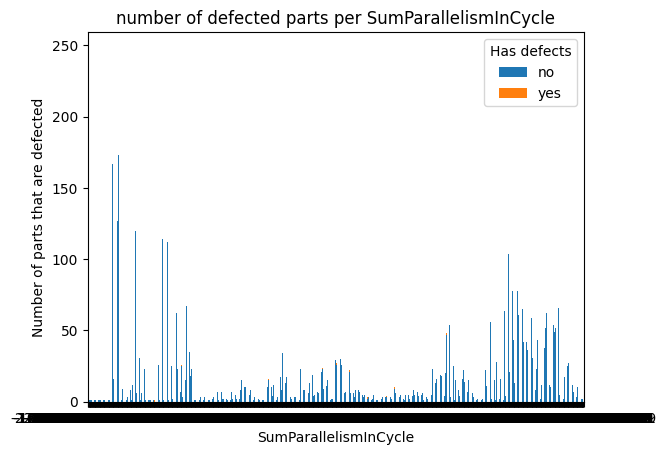

In [70]:
SumParallelismInCycle = pd.crosstab(df_merged_new["SumParallelismInCycle"], df_merged_new["Has_Defect"])
SumParallelismInCycle.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("SumParallelismInCycle")
plt.ylabel("Number of parts that are defected")
plt.legend(title="Has defects", labels=["no", "yes"])
plt.title("number of defected parts per SumParallelismInCycle")

In [71]:
SumParallelismInCycle ["perc"] = (SumParallelismInCycle[1] / (SumParallelismInCycle[0] + SumParallelismInCycle[1]))*100
SumParallelismInCycle

Has_Defect             0.0  1.0  perc
SumParallelismInCycle                
-2225.6                  1    0   0.0
-2224.9                  1    0   0.0
-2224.2                  1    0   0.0
-2217.0                  1    0   0.0
-2216.5                  1    0   0.0
...                    ...  ...   ...
 86.3                    2    0   0.0
 86.5                    1    0   0.0
 86.5                    1    0   0.0
 86.6                    1    0   0.0
 282.3                   1    0   0.0

[1597 rows x 3 columns]

### Create column SumCushionPumpPower

Sum of the values in the 3 pumps.

In [72]:
# Create column 'SumCushionPumpPower' with the sum of the values of the 3 pumps and drop the columns
df_merged_new['SumCushionPumpPower'] = df_merged_new['CushionPumpMaxPower1'] + df_merged_new['CushionPumpMaxPower2'] + df_merged_new['CushionPumpMaxPower3']
df_merged_new.drop(['CushionPumpMaxPower1', 'CushionPumpMaxPower2', 'CushionPumpMaxPower3'], axis=1, inplace=True)

df_merged_new

AmbientHumidity  AmbientTemperature  \
TraceabilityCode                                        
1010122318135217              NaN                 NaN   
1010122318135259              NaN                 NaN   
1010122318135412              NaN                 NaN   
1010122318141922              NaN                 NaN   
1010122319141031              NaN                 NaN   
...                           ...                 ...   
1012623048222115              NaN                 NaN   
1012723011144348              NaN                 NaN   
1012723011145624              NaN                 NaN   
1012823068072827              NaN                 NaN   
1012823068073134              NaN                 NaN   

                  ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
TraceabilityCode                                                               
1010122318135217                            NaN                          NaN   
1010122318135259                            NaN                          NaN   
1010122318135412                            NaN                          NaN   
1010122318141922                            NaN                          NaN   
1010122319141031                            NaN                          NaN   
...                                         ...                          ...   
1012623048222115                           45.1                          NaN   
1012723011144348                            NaN                          NaN   
1012723011145624                            NaN                          NaN   
1012823068072827                            NaN                          NaN   
1012823068073134                            NaN                          NaN   

                  CushionPumpMeanPower1  CushionPumpMeanPower2  \
TraceabilityCode                                                 
1010122318135217                    NaN                    NaN   
1010122318135259                    NaN                    NaN   
1010122318135412                    NaN                    NaN   
1010122318141922                    NaN                    NaN   
1010122319141031                    NaN                    NaN   
...                                 ...                    ...   
1012623048222115                    NaN                    NaN   
1012723011144348                    NaN                    NaN   
1012723011145624                    NaN                    NaN   
1012823068072827                    NaN                    NaN   
1012823068073134                    NaN                    NaN   

                  CushionPumpMeanPower3  CushionTemperatureUnitOil  \
TraceabilityCode                                                     
1010122318135217                    NaN                        NaN   
1010122318135259                    NaN                        NaN   
1010122318135412                    NaN                        NaN   
1010122318141922                    NaN                        NaN   
1010122319141031                    NaN                        NaN   
...                                 ...                        ...   
1012623048222115                    NaN                        NaN   
1012723011144348                    NaN                        NaN   
1012723011145624                    NaN                        NaN   
1012823068072827                    NaN                        NaN   
1012823068073134                    NaN                        NaN   

                  CushionWaterTemperature  Cylinder1MaxForce  ...  \
TraceabilityCode                                              ...   
1010122318135217                      NaN                NaN  ...   
1010122318135259                      NaN                NaN  ...   
1010122318135412                      NaN                NaN  ...   
1010122318141922                      NaN                NaN  ...   
1010122319141031                      NaN          

In [73]:
df_merged_new['SumCushionPumpPower'].value_counts()

159.9    435
128.7    378
160.5    374
139.2    370
160.2    339
        ... 
121.5      1
198.0      1
197.1      1
209.4      1
209.7      1
Name: SumCushionPumpPower, Length: 315, dtype: int64

In [74]:
df_merged_new['SumCushionPumpPower'].nunique()

315

Text(0.5, 1.0, 'number of defected parts per SumCushionPumpPower')

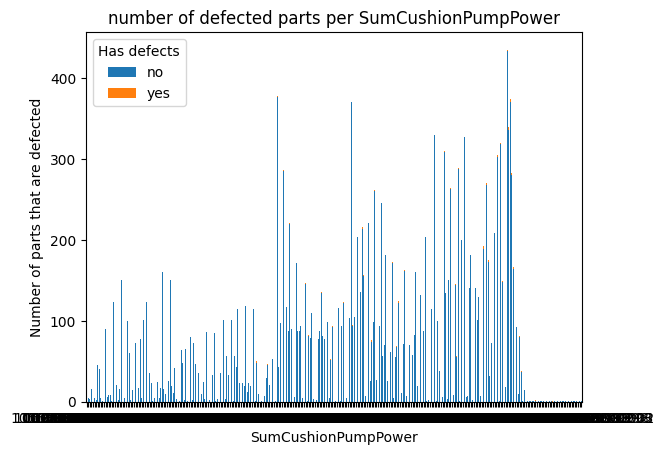

In [75]:
SumCushionPumpPower = pd.crosstab(df_merged_new["SumCushionPumpPower"], df_merged_new["Has_Defect"])
SumCushionPumpPower.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("SumCushionPumpPower")
plt.ylabel("Number of parts that are defected")
plt.legend(title="Has defects", labels=["no", "yes"])
plt.title("number of defected parts per SumCushionPumpPower")

In [76]:
SumCushionPumpPower ["perc"] = (SumCushionPumpPower[1] / (SumCushionPumpPower[0] + SumCushionPumpPower[1]))*100
SumCushionPumpPower

Has_Defect           0.0  1.0  perc
SumCushionPumpPower                
105.3                  3    0   0.0
105.6                  4    0   0.0
105.9                  3    0   0.0
106.2                 16    0   0.0
106.5                 16    0   0.0
...                  ...  ...   ...
207.9                  1    0   0.0
209.4                  1    0   0.0
209.7                  1    0   0.0
210.3                  1    0   0.0
406.5                  1    0   0.0

[315 rows x 3 columns]

7 out of 14 different values for SumCushionPumpPower have defects in them (even if low %), half of the values, this featrue seems important  

### Combine the temperature and humidity to create the Heat Index

In [77]:
# Create column 'HeatIndex' = 'AmbientHumidity' * 'AmbientTemperature' and drop the columns
df_merged_new['HeatIndex'] = df_merged_new['AmbientHumidity'] * df_merged_new['AmbientTemperature']
df_merged_new.drop(['AmbientHumidity', 'AmbientTemperature'], axis=1, inplace=True)

#df_merged_new

In [78]:
df_merged_new['HeatIndex'].value_counts()

557.76    440
668.10    407
560.00    392
513.38    366
562.24    353
         ... 
744.48      1
601.98      1
759.51      1
751.68      1
715.35      1
Name: HeatIndex, Length: 3953, dtype: int64

Text(0.5, 1.0, 'number of defected parts per HeatIndex')

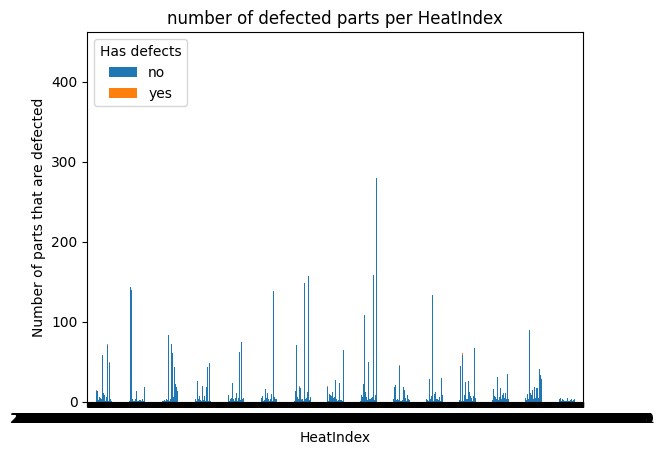

In [79]:
HeatIndex = pd.crosstab(df_merged_new["HeatIndex"], df_merged_new["Has_Defect"])
HeatIndex.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("HeatIndex")
plt.ylabel("Number of parts that are defected")
plt.legend(title="Has defects", labels=["no", "yes"])
plt.title("number of defected parts per HeatIndex")

In [80]:
HeatIndex ["perc"] = (HeatIndex[1] / (HeatIndex[0] + HeatIndex[1]))*100
HeatIndex

Has_Defect  0.0  1.0       perc
HeatIndex                      
257.04        2    1  33.333333
257.50        1    0   0.000000
258.06       37    0   0.000000
259.08       39    0   0.000000
259.56        3    0   0.000000
...         ...  ...        ...
784.40        2    0   0.000000
787.80        1    0   0.000000
793.44        1    0   0.000000
795.60        1    0   0.000000
799.10        1    0   0.000000

[3953 rows x 3 columns]

### Create column Total Average Power

Average of the mean power of all 3 pumps.

In [81]:
# Create column 'TotalAveragePower' with the mean of the values of the 3 pumps and drop the column
df_merged_new['TotalAveragePower'] = (df_merged_new['CushionPumpMeanPower1'] + df_merged_new['CushionPumpMeanPower2'] + df_merged_new['CushionPumpMeanPower3'])/3
df_merged_new.drop(['CushionPumpMeanPower1', 'CushionPumpMeanPower2', 'CushionPumpMeanPower3'], axis=1, inplace=True)

#df_merged_new

In [82]:
df_merged_new['TotalAveragePower'].value_counts()

49.333333    231
47.500000    224
47.400000    219
48.766667    217
47.000000    216
            ... 
29.866667      1
42.500000      1
35.666667      1
35.900000      1
28.600000      1
Name: TotalAveragePower, Length: 1023, dtype: int64

In [83]:
df_merged_new['TotalAveragePower'].nunique()

1023

Text(0.5, 1.0, 'number of defected parts per TotalAveragePower')

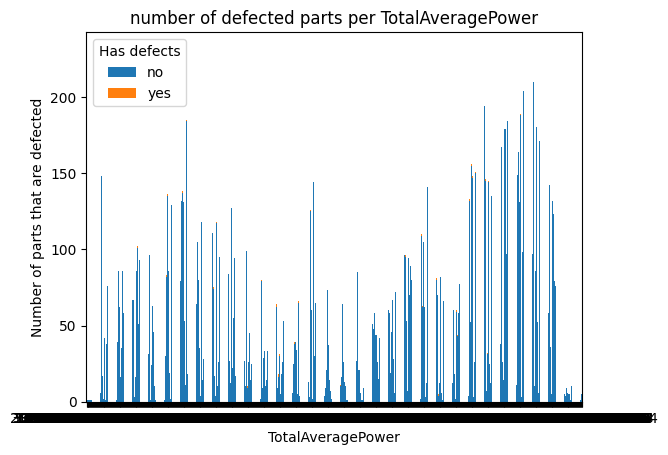

In [84]:
TotalAveragePower = pd.crosstab(df_merged_new["TotalAveragePower"], df_merged_new["Has_Defect"])
TotalAveragePower.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("TotalAveragePower")
plt.ylabel("Number of parts that are defected")
plt.legend(title="Has defects", labels=["no", "yes"])
plt.title("number of defected parts per TotalAveragePower")

In [85]:
TotalAveragePower ["perc"] = (TotalAveragePower[1] / (TotalAveragePower[0] + TotalAveragePower[1]))*100
TotalAveragePower

Has_Defect         0.0  1.0  perc
TotalAveragePower                
0.000000             4    0   0.0
21.000000            1    0   0.0
28.600000            1    0   0.0
29.866667            1    0   0.0
30.300000            1    0   0.0
...                ...  ...   ...
51.066667            4    0   0.0
51.066667            1    0   0.0
51.100000            1    0   0.0
51.100000            5    0   0.0
51.133333            1    0   0.0

[1023 rows x 3 columns]

Nothing important to say

### Create column TotalGearTorque

Sum of all 3 gear torques.

In [86]:
# Create column 'TotalGearTorque' as the sum of the 3 gears and drop the columns
df_merged_new['TotalGearTorque'] = df_merged_new['Gear1MaxTorque'] + df_merged_new['Gear2MaxTorque'] + df_merged_new['Gear3MaxTorque']
df_merged_new.drop(['Gear1MaxTorque', 'Gear2MaxTorque', 'Gear3MaxTorque'], axis=1, inplace=True)

df_merged_new

ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
TraceabilityCode                                                               
1010122318135217                            NaN                          NaN   
1010122318135259                            NaN                          NaN   
1010122318135412                            NaN                          NaN   
1010122318141922                            NaN                          NaN   
1010122319141031                            NaN                          NaN   
...                                         ...                          ...   
1012623048222115                           45.1                          NaN   
1012723011144348                            NaN                          NaN   
1012723011145624                            NaN                          NaN   
1012823068072827                            NaN                          NaN   
1012823068073134                            NaN                          NaN   

                  CushionTemperatureUnitOil  CushionWaterTemperature  \
TraceabilityCode                                                       
1010122318135217                        NaN                      NaN   
1010122318135259                        NaN                      NaN   
1010122318135412                        NaN                      NaN   
1010122318141922                        NaN                      NaN   
1010122319141031                        NaN                      NaN   
...                                     ...                      ...   
1012623048222115                        NaN                      NaN   
1012723011144348                        NaN                      NaN   
1012723011145624                        NaN                      NaN   
1012823068072827                        NaN                      NaN   
1012823068073134                        NaN                      NaN   

                  Cylinder1MaxForce  Cylinder2MaxForce  Cylinder3MaxForce  \
TraceabilityCode                                                            
1010122318135217                NaN                NaN                NaN   
1010122318135259                NaN                NaN                NaN   
1010122318135412                NaN                NaN                NaN   
1010122318141922                NaN                NaN                NaN   
1010122319141031                NaN                NaN                NaN   
...                             ...                ...                ...   
1012623048222115                NaN                NaN                NaN   
1012723011144348                NaN                NaN                NaN   
1012723011145624                NaN                NaN                NaN   
1012823068072827                NaN                NaN                NaN   
1012823068073134                NaN                NaN                NaN   

                  Cylinder4MaxForce  Cylinder5MaxForce  Cylinder6MaxForce  \
TraceabilityCode                                                            
1010122318135217                NaN                NaN                NaN   
1010122318135259                NaN                NaN                NaN   
1010122318135412                NaN                NaN                NaN   
1010122318141922                NaN                NaN                NaN   
1010122319141031                NaN                NaN                NaN   
...                             ...                ...                ...   
1012623048222115                NaN                NaN                NaN   
1012723011144348                NaN                NaN                NaN   
1012723011145624                NaN                NaN                NaN   
1012823068072827                NaN                NaN                NaN   
1012823068073134                NaN                NaN                NaN   

                  ...  Has_Defect  D

In [87]:
df_merged_new.columns

Index(['ClutchBrakeTemperatureUnitOil', 'ClutchBrakeWaterTemperature',
       'CushionTemperatureUnitOil', 'CushionWaterTemperature',
       'Cylinder1MaxForce', 'Cylinder2MaxForce', 'Cylinder3MaxForce',
       'Cylinder4MaxForce', 'Cylinder5MaxForce', 'Cylinder6MaxForce',
       'Cylinder7MaxForce', 'Cylinder8MaxForce', 'HELMGaugesControl',
       'LubricationTemperatureUnitOil', 'MainMotorMaxPower',
       'MainMotorMeanPower', 'MaxForceFL', 'MaxForceFR', 'MaxForceRL',
       'MaxForceRR', 'MaxOffCenteredLoadFR', 'MaxOffCenteredLoadLR',
       'OverloadSystemPrechargePressure', 'PartEnergy', 'PressForceValueFL',
       'PressForceValueFR', 'PressForceValueRL', 'PressForceValueRR',
       'ProcessEnergy', 'SlideAccelerationDown', 'SlideAccelerationUp',
       'SlidePositionDown', 'SlidePositionUp', 'SlideSpeedDown',
       'SlideSpeedUp', 'TotalMaxForce', 'TotalPressForceValue', 'Defect',
       'Has_Defect', 'DayOfMonth_sin', 'DayOfMonth_cos', 'MinuteOfDay_sin',
       'MinuteOfDay_c

In [88]:
df_merged_new['TotalGearTorque'].value_counts()

18.0     886
88.2     824
17.7     741
88.5     738
87.9     687
        ... 
168.8      1
164.7      1
14.1       1
120.3      1
163.4      1
Name: TotalGearTorque, Length: 2851, dtype: int64

Text(0.5, 1.0, 'number of defected parts per TotalGearTorque')

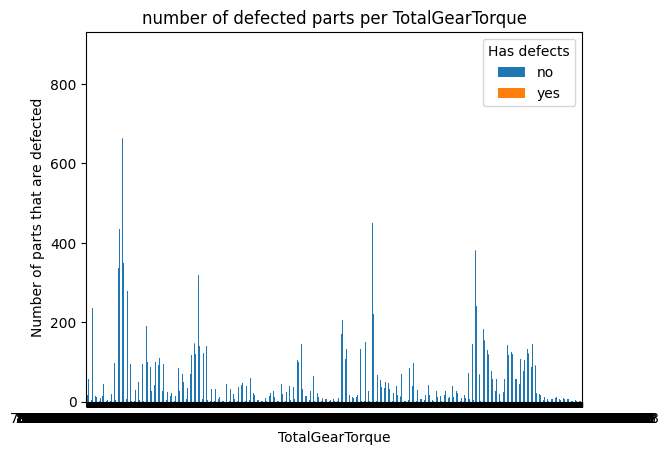

In [89]:
TotalGearTorque = pd.crosstab(df_merged_new["TotalGearTorque"], df_merged_new["Has_Defect"])
TotalGearTorque.plot(kind = "bar", stacked = True, rot=0)

# Graph labels 
plt.xlabel("TotalGearTorque")
plt.ylabel("Number of parts that are defected")
plt.legend(title="Has defects", labels=["no", "yes"])
plt.title("number of defected parts per TotalGearTorque")

In [90]:
TotalGearTorque ["perc"] = (TotalGearTorque[1] / (TotalGearTorque[0] + TotalGearTorque[1]))*100
TotalGearTorque

Has_Defect       0.0  1.0  perc
TotalGearTorque                
6.1                1    0   0.0
7.1                1    0   0.0
7.2                4    0   0.0
7.2                1    0   0.0
7.3                4    0   0.0
...              ...  ...   ...
169.4              1    0   0.0
169.5              1    0   0.0
169.7              1    0   0.0
170.4              1    0   0.0
171.0              1    0   0.0

[2851 rows x 3 columns]

Nothing important to say.

## Impute Null Values

In [91]:
# Impute all missing values with the mean of the column
df_merged_new = df_merged_new.fillna(df_merged_new.mean())


/var/folders/xq/n_q5kmh104s270y6h09wrhtc0000gn/T/ipykernel_24316/3208106781.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_merged_new = df_merged_new.fillna(df_merged_new.mean())


# 5. Models

## 1. Binary Classification



### Model selection:

We started with a random forest model to get a general understanding of our data, the AUC and other results seemed too high (0.95), probably because the data is unbalanced. So we tried over and undersampling, there was no difference between these two but we chose to go with undersampling. To make sure that we were splitting the data correctly, we added the condition stratify = y, to have a similar repartition of ys between train and test. It reduced the AUC from 0.95 to 0.92, but it still seemed oddly good.

The results didn't change much. So we tried to implement XGBoost and we also got the same results, the model was probably overfitting. We then split the dataset into train and test, ran RF with undersampling, this time using 10 folds cross validation, and then testing on the test data. 

The results now looked much better, AUC was around 87% (consistent accross all folds), all the other metrics were giving the same consistant good results (include them!!). We did 5 folds and 10 folds CV (indlude that we did 5 folds in the report but no need to show results).

To assess the robustness of our model, we looked at the feature importances and the learning curve, all features are equally important and the learning curve doesn't show overfitting (elaborate a bit). We also add the condition stratify = y_undersampled when splitting the data, to make sure that we don't have a split without 1s for the target variable, this didn't change the results.

We are now sure that our model works and does not overfit.

We tried other models that could maybe improve our predictions 
- Ensemble with RF and AdaBoost -->  the scores were similar --> no need for this more complicated solution
- XGBoost --> higher scores (give the results), but by looking at the training curve we see that it's overfitting https://towardsdatascience.com/learning-curve-to-identify-overfitting-underfitting-problems-133177f38df5, it also seems to give more importance to 2 features than the rest.
- We use RF because of all these reasons.

### Feature engineering:
    
Before feature engineering, using the same models, we were having AUC scores between 0.80 and 0.82. These scores were also not consistant and were changing everytime we ran the model. When performing CV, we also had a lot of inconsistencies between all folds. With FE, we have reduced the number of columns to 48 (instead of 68) and we have a much more robust dataset. The scores are now consistent between all models and all folds within the model, models run really fast, and all features are EQUALLY IMPORTANT.



In [92]:
# Copy the datafram and drop the column 'Defect', which will not be used for the model
df_binary = df_merged_new.copy()
df_binary.drop(['Defect'], axis=1, inplace=True)
df_binary

ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
TraceabilityCode                                                               
1010122318135217                      49.348984                    30.302208   
1010122318135259                      49.348984                    30.302208   
1010122318135412                      49.348984                    30.302208   
1010122318141922                      49.348984                    30.302208   
1010122319141031                      49.348984                    30.302208   
...                                         ...                          ...   
1012623048222115                      45.100000                    30.302208   
1012723011144348                      49.348984                    30.302208   
1012723011145624                      49.348984                    30.302208   
1012823068072827                      49.348984                    30.302208   
1012823068073134                      49.348984                    30.302208   

                  CushionTemperatureUnitOil  CushionWaterTemperature  \
TraceabilityCode                                                       
1010122318135217                  61.564387                33.433768   
1010122318135259                  61.564387                33.433768   
1010122318135412                  61.564387                33.433768   
1010122318141922                  61.564387                33.433768   
1010122319141031                  61.564387                33.433768   
...                                     ...                      ...   
1012623048222115                  61.564387                33.433768   
1012723011144348                  61.564387                33.433768   
1012723011145624                  61.564387                33.433768   
1012823068072827                  61.564387                33.433768   
1012823068073134                  61.564387                33.433768   

                  Cylinder1MaxForce  Cylinder2MaxForce  Cylinder3MaxForce  \
TraceabilityCode                                                            
1010122318135217          68.961007          59.895986          68.470716   
1010122318135259          68.961007          59.895986          68.470716   
1010122318135412          68.961007          59.895986          68.470716   
1010122318141922          68.961007          59.895986          68.470716   
1010122319141031          68.961007          59.895986          68.470716   
...                             ...                ...                ...   
1012623048222115          68.961007          59.895986          68.470716   
1012723011144348          68.961007          59.895986          68.470716   
1012723011145624          68.961007          59.895986          68.470716   
1012823068072827          68.961007          59.895986          68.470716   
1012823068073134          68.961007          59.895986          68.470716   

                  Cylinder4MaxForce  Cylinder5MaxForce  Cylinder6MaxForce  \
TraceabilityCode                                                            
1010122318135217          60.956975          58.351343          60.675083   
1010122318135259          60.956975          58.351343          60.675083   
1010122318135412          60.956975          58.351343          60.675083   
1010122318141922          60.956975          58.351343          60.675083   
1010122319141031          60.956975          58.351343          60.675083   
...                             ...                ...                ...   
1012623048222115          60.956975          58.351343          60.675083   
1012723011144348          60.956975          58.351343          60.675083   
1012723011145624          60.956975          58.351343          60.675083   
1012823068072827          60.956975          58.351343          60.675083   
1012823068073134          60.956975          58.351343          60.675083   

                  ...  Has_Defect  D

In [93]:
df_binary.columns

Index(['ClutchBrakeTemperatureUnitOil', 'ClutchBrakeWaterTemperature',
       'CushionTemperatureUnitOil', 'CushionWaterTemperature',
       'Cylinder1MaxForce', 'Cylinder2MaxForce', 'Cylinder3MaxForce',
       'Cylinder4MaxForce', 'Cylinder5MaxForce', 'Cylinder6MaxForce',
       'Cylinder7MaxForce', 'Cylinder8MaxForce', 'HELMGaugesControl',
       'LubricationTemperatureUnitOil', 'MainMotorMaxPower',
       'MainMotorMeanPower', 'MaxForceFL', 'MaxForceFR', 'MaxForceRL',
       'MaxForceRR', 'MaxOffCenteredLoadFR', 'MaxOffCenteredLoadLR',
       'OverloadSystemPrechargePressure', 'PartEnergy', 'PressForceValueFL',
       'PressForceValueFR', 'PressForceValueRL', 'PressForceValueRR',
       'ProcessEnergy', 'SlideAccelerationDown', 'SlideAccelerationUp',
       'SlidePositionDown', 'SlidePositionUp', 'SlideSpeedDown',
       'SlideSpeedUp', 'TotalMaxForce', 'TotalPressForceValue', 'Has_Defect',
       'DayOfMonth_sin', 'DayOfMonth_cos', 'MinuteOfDay_sin',
       'MinuteOfDay_cos', 'SumP

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from scipy.stats import randint as sp_randint

In [95]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred, y_pred_proba):
    metric_names = ['Accuracy', 'AUC-ROC', 'Precision', 'Recall', 'F1 Score', 'Gini Coefficient']
    metrics = []

    accuracy = accuracy_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_pred_proba)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    gini = 2 * auc_roc - 1

    metrics.extend([accuracy, auc_roc, precision, recall, f1, gini])

    for name, metric in zip(metric_names, metrics):
        print(f"{name}: {metric}")

    #return metrics

### Basic Random Forest

In [96]:
# Basic Random Forest Classifier and prediction of probabilities

# Create the X and y variables
X = df_binary.drop(["Has_Defect"], axis=1)
y = df_binary["Has_Defect"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model on the undersampled training data
rf_model = rf_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

y_pred = rf_model.predict(X_test)

In [97]:
calculate_metrics(y_test,y_pred,y_pred_proba)

Accuracy: 0.9980832800911137
AUC-ROC: 0.915721009360944
Precision: 0.9861111111111112
Recall: 0.5107913669064749
F1 Score: 0.6729857819905214
Gini Coefficient: 0.831442018721888


### Random Forest with undersampling

In [98]:
# Create the X and y variables
X = df_binary.drop(["Has_Defect"], axis=1)
y = df_binary["Has_Defect"]

# Split the data into training and test sets (0,75 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, stratify=y)

# Apply undersampling to the training set
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

# Fit the model on the undersampled training data
rf_model.fit(X_train_undersampled, y_train_undersampled)

# Predict probabilities on the test set
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Define the threshold value
threshold = 0.7

# Convert probabilities to binary predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the ROC AUC score
#roc_auc = roc_auc_score(y_test, y_pred_proba)
#print(f"ROC AUC Score: {roc_auc}")

# Evaluate the ROC AUC score using binary predictions
res = calculate_metrics(y_test,y_pred,y_pred_proba)
print(res)

Accuracy: 0.9671657546042945
AUC-ROC: 0.9183709850618151
Precision: 0.06683168316831684
Recall: 0.6136363636363636
F1 Score: 0.12053571428571429
Gini Coefficient: 0.8367419701236303
None


In [99]:
importance_scores = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display the importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

                            Feature  Importance
18                       MaxForceRL    0.049732
28                    ProcessEnergy    0.047182
19                       MaxForceRR    0.046958
36             TotalPressForceValue    0.046215
26                PressForceValueRL    0.041670
21             MaxOffCenteredLoadLR    0.040362
17                       MaxForceFR    0.038954
20             MaxOffCenteredLoadFR    0.036001
12                HELMGaugesControl    0.035466
14                MainMotorMaxPower    0.033188
25                PressForceValueFR    0.031335
16                       MaxForceFL    0.030659
31                SlidePositionDown    0.030170
24                PressForceValueFL    0.029799
23                       PartEnergy    0.028377
40                  MinuteOfDay_cos    0.027684
27                PressForceValueRR    0.026641
15               MainMotorMeanPower    0.025220
32                  SlidePositionUp    0.023168
35                    TotalMaxForce    0

### XGBoost undersampling

In [100]:
# Import the required libraries
from xgboost import XGBClassifier

# Create the X and y variables
X = df_binary.drop(["Has_Defect"], axis=1)
y = df_binary["Has_Defect"]

# Split the data into training and test sets (0.75 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, stratify=y)

# Apply undersampling to the training set
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Create an XGBoost classifier
xgb_model = XGBClassifier(n_estimators=1000, random_state=0)

# Fit the model on the undersampled training data
xgb_model.fit(X_train_undersampled, y_train_undersampled)

# Predict probabilities on the test set
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Define the threshold value
threshold = 0.7

# Convert probabilities to binary predictions based on the threshold
y_pred = (y_pred_proba >= threshold).astype(int)

# Evaluate the metrics
res = calculate_metrics(y_test, y_pred, y_pred_proba)
print(res)

Accuracy: 0.9101363926775744
AUC-ROC: 0.9223562471115931
Precision: 0.031127228770021154
Recall: 0.7803030303030303
F1 Score: 0.05986631793083406
Gini Coefficient: 0.8447124942231863
None


### Random Forest with CV

In [101]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

# Create the X and y variables
X = df_binary.drop(["Has_Defect"], axis=1)
y = df_binary["Has_Defect"]

# Apply undersampling to the data
undersampler = RandomUnderSampler(random_state=423)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=0, stratify=y_undersampled)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'auc_roc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
}

# Perform cross-validation on the training set and calculate the metrics
cv_results = cross_validate(rf_model, X_train, y_train, cv=10, scoring=scoring)

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf_model.predict(X_test)
test_auc_roc = roc_auc_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Print the scores for each metric and each fold
print("Accuracy Scores for each fold during cross-validation:", cv_results['test_accuracy'])
print("AUC-ROC Scores for each fold during cross-validation:", cv_results['test_auc_roc'])
print("Precision Scores for each fold during cross-validation:", cv_results['test_precision'])
print("Recall Scores for each fold during cross-validation:", cv_results['test_recall'])
print("F1 Scores for each fold during cross-validation:", cv_results['test_f1'])

# Print the mean and standard deviation of each metric during cross-validation
print("Mean Accuracy during cross-validation:", cv_results['test_accuracy'].mean())
print("Mean AUC-ROC Score during cross-validation:", cv_results['test_auc_roc'].mean())
print("Mean Precision during cross-validation:", cv_results['test_precision'].mean())
print("Mean Recall during cross-validation:", cv_results['test_recall'].mean())
print("Mean F1 Score during cross-validation:", cv_results['test_f1'].mean())

# Print the scores on the test set
print("AUC-ROC Score on the test set:", test_auc_roc)
print("Precision on the test set:", test_precision)
print("Recall on the test set:", test_recall)
print("F1 Score on the test set:", test_f1)
print("Confusion Matrix:", conf_matrix)

Accuracy Scores for each fold during cross-validation: [0.87058824 0.91764706 0.8        0.83529412 0.89285714 0.75
 0.91666667 0.94047619 0.92857143 0.85714286]
AUC-ROC Scores for each fold during cross-validation: [0.8709856  0.91805094 0.79928018 0.83499446 0.89285714 0.75
 0.91666667 0.94047619 0.92857143 0.85714286]
Precision Scores for each fold during cross-validation: [0.9        0.95       0.83783784 0.85       0.86666667 0.8
 0.94871795 0.97435897 0.95       0.84090909]
Recall Scores for each fold during cross-validation: [0.8372093  0.88372093 0.73809524 0.80952381 0.92857143 0.66666667
 0.88095238 0.9047619  0.9047619  0.88095238]
F1 Scores for each fold during cross-validation: [0.86746988 0.91566265 0.78481013 0.82926829 0.89655172 0.72727273
 0.91358025 0.9382716  0.92682927 0.86046512]
Mean Accuracy during cross-validation: 0.8709243697478992
Mean AUC-ROC Score during cross-validation: 0.8709025470653378
Mean Precision during cross-validation: 0.8918490518490518
Mean Re

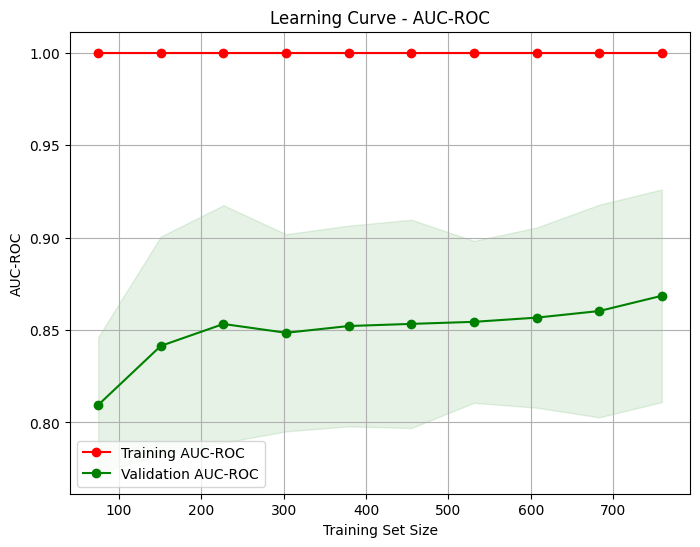

In [102]:
from sklearn.model_selection import learning_curve

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=10,
                                                        scoring=make_scorer(roc_auc_score), train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training AUC-ROC')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation AUC-ROC')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                 alpha=0.1, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('AUC-ROC')
plt.title('Learning Curve - AUC-ROC')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [103]:
importance_scores = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display the importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

                            Feature  Importance
21             MaxOffCenteredLoadLR    0.049346
20             MaxOffCenteredLoadFR    0.045038
26                PressForceValueRL    0.043063
28                    ProcessEnergy    0.041834
36             TotalPressForceValue    0.041512
27                PressForceValueRR    0.041410
31                SlidePositionDown    0.041375
16                       MaxForceFL    0.040964
18                       MaxForceRL    0.039552
19                       MaxForceRR    0.038599
25                PressForceValueFR    0.037995
40                  MinuteOfDay_cos    0.029794
12                HELMGaugesControl    0.029323
15               MainMotorMeanPower    0.027180
14                MainMotorMaxPower    0.026701
17                       MaxForceFR    0.026160
33                   SlideSpeedDown    0.024922
39                  MinuteOfDay_sin    0.023929
37                   DayOfMonth_sin    0.023419
32                  SlidePositionUp    0

#### Hyperparameter tuning

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Create the randomized search object
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10,
                                   scoring=make_scorer(roc_auc_score), cv=10, random_state=0)

# Perform randomized search on the training set
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Train the model with the best parameters on the entire training set
best_rf_model = RandomForestClassifier(**best_params, random_state=0)
best_rf_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)
test_auc_roc = roc_auc_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Print the scores on the test set
print("AUC-ROC Score on the test set:", test_auc_roc)
print("Precision on the test set:", test_precision)
print("Recall on the test set:", test_recall)
print("F1 Score on the test set:", test_f1)
print("Confusion Matrix:", conf_matrix)


Best Parameters: {'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 137}
Best Score: 0.8673311184939093
AUC-ROC Score on the test set: 0.8537735849056605
Precision on the test set: 0.8571428571428571
Recall on the test set: 0.8490566037735849
F1 Score on the test set: 0.8530805687203792
Confusion Matrix: [[91 15]
 [16 90]]


### XGBoost with CV

In [105]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

# Create the X and y variables
X = df_binary.drop(["Has_Defect"], axis=1)
y = df_binary["Has_Defect"]

# Apply undersampling to the data
undersampler = RandomUnderSampler(random_state=423)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=0, stratify=y_undersampled)

# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=0)

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'auc_roc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
}

# Perform cross-validation on the training set and calculate the metrics
cv_results = cross_validate(xgb_model, X_train, y_train, cv=10, scoring=scoring)

# Train the model on the entire training set
xgb_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = xgb_model.predict(X_test)
test_auc_roc = roc_auc_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the scores for each metric and each fold
print("Accuracy Scores for each fold during cross-validation:", cv_results['test_accuracy'])
print("AUC-ROC Scores for each fold during cross-validation:", cv_results['test_auc_roc'])
print("Precision Scores for each fold during cross-validation:", cv_results['test_precision'])
print("Recall Scores for each fold during cross-validation:", cv_results['test_recall'])
print("F1 Scores for each fold during cross-validation:", cv_results['test_f1'])

# Print the mean and standard deviation of each metric during cross-validation
print("Mean Accuracy during cross-validation:", cv_results['test_accuracy'].mean())
print("Mean AUC-ROC Score during cross-validation:", cv_results['test_auc_roc'].mean())
print("Mean Precision during cross-validation:", cv_results['test_precision'].mean())
print("Mean Recall during cross-validation:", cv_results['test_recall'].mean())
print("Mean F1 Score during cross-validation:", cv_results['test_f1'].mean())

# Print the scores on the test set
print("AUC-ROC Score on the test set:", test_auc_roc)
print("Precision on the test set:", test_precision)
print("Recall on the test set:", test_recall)
print("F1 Score on the test set:", test_f1)
print("Confusion Matrix:", conf_matrix)

Accuracy Scores for each fold during cross-validation: [0.88235294 0.90588235 0.85882353 0.81176471 0.92857143 0.76190476
 0.95238095 0.95238095 0.91666667 0.88095238]
AUC-ROC Scores for each fold during cross-validation: [0.88261351 0.90614618 0.85797342 0.81173865 0.92857143 0.76190476
 0.95238095 0.95238095 0.91666667 0.88095238]
Precision Scores for each fold during cross-validation: [0.90243902 0.92682927 0.91666667 0.80952381 0.90909091 0.78947368
 0.95238095 0.95238095 0.92682927 0.84782609]
Recall Scores for each fold during cross-validation: [0.86046512 0.88372093 0.78571429 0.80952381 0.95238095 0.71428571
 0.95238095 0.95238095 0.9047619  0.92857143]
F1 Scores for each fold during cross-validation: [0.88095238 0.9047619  0.84615385 0.80952381 0.93023256 0.75
 0.95238095 0.95238095 0.91566265 0.88636364]
Mean Accuracy during cross-validation: 0.8851680672268907
Mean AUC-ROC Score during cross-validation: 0.8851328903654485
Mean Precision during cross-validation: 0.89334406221

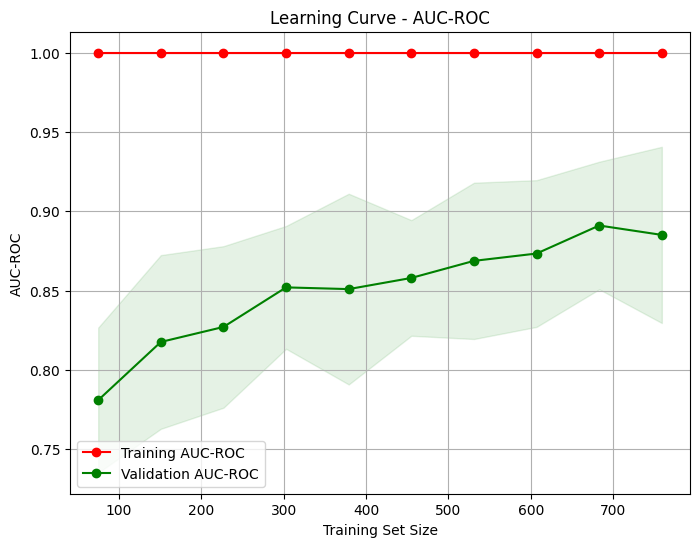

In [106]:
from sklearn.model_selection import learning_curve

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(xgb_model, X_train, y_train, cv=10,
                                                        scoring=make_scorer(roc_auc_score), train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training AUC-ROC')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation AUC-ROC')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                 alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                 alpha=0.1, color='g')
plt.xlabel('Training Set Size')
plt.ylabel('AUC-ROC')
plt.title('Learning Curve - AUC-ROC')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [107]:
importance_scores = xgb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display the importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_scores})

# Sort the DataFrame by importance score in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

                            Feature  Importance
36             TotalPressForceValue    0.165725
26                PressForceValueRL    0.163709
16                       MaxForceFL    0.057807
41            SumParallelismInCycle    0.044510
31                SlidePositionDown    0.039620
19                       MaxForceRR    0.031195
21             MaxOffCenteredLoadLR    0.027586
37                   DayOfMonth_sin    0.027127
42              SumCushionPumpPower    0.024463
9                 Cylinder6MaxForce    0.024037
30              SlideAccelerationUp    0.023691
34                     SlideSpeedUp    0.018038
12                HELMGaugesControl    0.015650
20             MaxOffCenteredLoadFR    0.015308
40                  MinuteOfDay_cos    0.013924
43                        HeatIndex    0.013883
28                    ProcessEnergy    0.013466
3           CushionWaterTemperature    0.013464
23                       PartEnergy    0.013337
5                 Cylinder2MaxForce    0

### Ensemble Model

In [108]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from imblearn.under_sampling import RandomUnderSampler

# Create the X and y variables
X = df_binary.drop(["Has_Defect"], axis=1)
y = df_binary["Has_Defect"]

# Apply undersampling to the data
undersampler = RandomUnderSampler(random_state=423)
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=0, stratify=y_undersampled)

# Create the base models
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
ada_model = AdaBoostClassifier(n_estimators=100, random_state=0)

# Create the ensemble model
ensemble_model = AdaBoostClassifier(base_estimator=rf_model, n_estimators=100, random_state=0)

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'auc_roc': make_scorer(roc_auc_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
}

# Perform cross-validation on the training set and calculate the metrics for the ensemble model
cv_results = cross_validate(ensemble_model, X_train, y_train, cv=10, scoring=scoring)

# Train the ensemble model on the entire training set
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model on the test set
y_pred = ensemble_model.predict(X_test)
test_auc_roc = roc_auc_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the scores for each metric and each fold
print("Accuracy Scores for each fold during cross-validation:", cv_results['test_accuracy'])
print("AUC-ROC Scores for each fold during cross-validation:", cv_results['test_auc_roc'])
print("Precision Scores for each fold during cross-validation:", cv_results['test_precision'])
print("Recall Scores for each fold during cross-validation:", cv_results['test_recall'])
print("F1 Scores for each fold during cross-validation:", cv_results['test_f1'])

# Print the mean and standard deviation of each metric during cross-validation
print("Mean Accuracy during cross-validation:", cv_results['test_accuracy'].mean())
print("Mean AUC-ROC Score during cross-validation:", cv_results['test_auc_roc'].mean())
print("Mean Precision during cross-validation:", cv_results['test_precision'].mean())
print("Mean Recall during cross-validation:", cv_results['test_recall'].mean())
print("Mean F1 Score during cross-validation:", cv_results['test_f1'].mean())

# Print the scores on the test set
print("AUC-ROC Score on the test set:", test_auc_roc)
print("Precision on the test set:", test_precision)
print("Recall on the test set:", test_recall)
print("F1 Score on the test set:", test_f1)

# Print the confusion matrix
print("Confusion Matrix:", conf_matrix)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/

Accuracy Scores for each fold during cross-validation: [0.89411765 0.90588235 0.83529412 0.78823529 0.91666667 0.72619048
 0.9047619  0.94047619 0.91666667 0.88095238]
AUC-ROC Scores for each fold during cross-validation: [0.89451827 0.90614618 0.8341639  0.78820598 0.91666667 0.72619048
 0.9047619  0.94047619 0.91666667 0.88095238]
Precision Scores for each fold during cross-validation: [0.925      0.92682927 0.91176471 0.78571429 0.88888889 0.78787879
 0.925      0.95121951 0.94871795 0.88095238]
Recall Scores for each fold during cross-validation: [0.86046512 0.88372093 0.73809524 0.78571429 0.95238095 0.61904762
 0.88095238 0.92857143 0.88095238 0.88095238]
F1 Scores for each fold during cross-validation: [0.89156627 0.9047619  0.81578947 0.78571429 0.91954023 0.69333333
 0.90243902 0.93975904 0.91358025 0.88095238]
Mean Accuracy during cross-validation: 0.8709243697478992
Mean AUC-ROC Score during cross-validation: 0.870874861572536
Mean Precision during cross-validation: 0.893196

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


## 2. Multiclass Models

In [109]:
# Copy the dataframe for the analysis
df_multiclass = df_merged_new.copy()
df_multiclass.head()

ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
TraceabilityCode                                                               
1010122318135217                      49.348984                    30.302208   
1010122318135259                      49.348984                    30.302208   
1010122318135412                      49.348984                    30.302208   
1010122318141922                      49.348984                    30.302208   
1010122319141031                      49.348984                    30.302208   

                  CushionTemperatureUnitOil  CushionWaterTemperature  \
TraceabilityCode                                                       
1010122318135217                  61.564387                33.433768   
1010122318135259                  61.564387                33.433768   
1010122318135412                  61.564387                33.433768   
1010122318141922                  61.564387                33.433768   
1010122319141031                  61.564387                33.433768   

                  Cylinder1MaxForce  Cylinder2MaxForce  Cylinder3MaxForce  \
TraceabilityCode                                                            
1010122318135217          68.961007          59.895986          68.470716   
1010122318135259          68.961007          59.895986          68.470716   
1010122318135412          68.961007          59.895986          68.470716   
1010122318141922          68.961007          59.895986          68.470716   
1010122319141031          68.961007          59.895986          68.470716   

                  Cylinder4MaxForce  Cylinder5MaxForce  Cylinder6MaxForce  \
TraceabilityCode                                                            
1010122318135217          60.956975          58.351343          60.675083   
1010122318135259          60.956975          58.351343          60.675083   
1010122318135412          60.956975          58.351343          60.675083   
1010122318141922          60.956975          58.351343          60.675083   
1010122319141031          60.956975          58.351343          60.675083   

                  ...  Has_Defect  DayOfMonth_sin  DayOfMonth_cos  \
TraceabilityCode  ...                                               
1010122318135217  ...         1.0        0.105015        -0.17696   
1010122318135259  ...         1.0        0.105015        -0.17696   
1010122318135412  ...         1.0        0.105015        -0.17696   
1010122318141922  ...         1.0        0.105015        -0.17696   
1010122319141031  ...         1.0        0.105015        -0.17696   

                  MinuteOfDay_sin  MinuteOfDay_cos  SumParallelismInCycle  \
TraceabilityCode                                                            
1010122318135217        -0.070086         0.036848             -10.305688   
1010122318135259        -0.070086         0.036848             -10.305688   
1010122318135412        -0.070086         0.036848             -10.305688   
1010122318141922        -0.070086         0.036848             -10.305688   
1010122319141031        -0.070086         0.036848             -10.305688   

                  SumCushionPumpPower   HeatIndex  TotalAveragePower  \
TraceabilityCode                                                       
1010122318135217           141.593522  514.956969           42.55927   
1010122318135259           141.593522  514.956969           42.55927   
1010122318135412           141.593522  514.956969           42.55927   
1010122318141922           141.593522  514.956969           42.55927   
1010122319141031           141.593522  514.956969           42.55927   

                  TotalGearTorque  
TraceabilityCode                   
1010122318135217        69.284054  
1010122318135259        69.284054  
1010122318135412        69.284054  
1010122318141922        69.284054  
1010122319141031        69.284054  

[5 rows x 48 columns]

In [110]:
df_multiclass

ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
TraceabilityCode                                                               
1010122318135217                      49.348984                    30.302208   
1010122318135259                      49.348984                    30.302208   
1010122318135412                      49.348984                    30.302208   
1010122318141922                      49.348984                    30.302208   
1010122319141031                      49.348984                    30.302208   
...                                         ...                          ...   
1012623048222115                      45.100000                    30.302208   
1012723011144348                      49.348984                    30.302208   
1012723011145624                      49.348984                    30.302208   
1012823068072827                      49.348984                    30.302208   
1012823068073134                      49.348984                    30.302208   

                  CushionTemperatureUnitOil  CushionWaterTemperature  \
TraceabilityCode                                                       
1010122318135217                  61.564387                33.433768   
1010122318135259                  61.564387                33.433768   
1010122318135412                  61.564387                33.433768   
1010122318141922                  61.564387                33.433768   
1010122319141031                  61.564387                33.433768   
...                                     ...                      ...   
1012623048222115                  61.564387                33.433768   
1012723011144348                  61.564387                33.433768   
1012723011145624                  61.564387                33.433768   
1012823068072827                  61.564387                33.433768   
1012823068073134                  61.564387                33.433768   

                  Cylinder1MaxForce  Cylinder2MaxForce  Cylinder3MaxForce  \
TraceabilityCode                                                            
1010122318135217          68.961007          59.895986          68.470716   
1010122318135259          68.961007          59.895986          68.470716   
1010122318135412          68.961007          59.895986          68.470716   
1010122318141922          68.961007          59.895986          68.470716   
1010122319141031          68.961007          59.895986          68.470716   
...                             ...                ...                ...   
1012623048222115          68.961007          59.895986          68.470716   
1012723011144348          68.961007          59.895986          68.470716   
1012723011145624          68.961007          59.895986          68.470716   
1012823068072827          68.961007          59.895986          68.470716   
1012823068073134          68.961007          59.895986          68.470716   

                  Cylinder4MaxForce  Cylinder5MaxForce  Cylinder6MaxForce  \
TraceabilityCode                                                            
1010122318135217          60.956975          58.351343          60.675083   
1010122318135259          60.956975          58.351343          60.675083   
1010122318135412          60.956975          58.351343          60.675083   
1010122318141922          60.956975          58.351343          60.675083   
1010122319141031          60.956975          58.351343          60.675083   
...                             ...                ...                ...   
1012623048222115          60.956975          58.351343          60.675083   
1012723011144348          60.956975          58.351343          60.675083   
1012723011145624          60.956975          58.351343          60.675083   
1012823068072827          60.956975          58.351343          60.675083   
1012823068073134          60.956975          58.351343          60.675083   

                  ...  Has_Defect  D

In [111]:
df_multiclass["Defect"].value_counts()

No Defect                            143466
Pikos (marks/contamination)             142
Deformacja (deformation)                113
Odciśnięte miejsce (marks)               95
Pofalowanie (waves)                      43
Przeciągnięcie (thinning)                43
Błąd materiału (meterial failure)        35
Pęknięcie (cracks)                       26
Rysa (scratch)                           13
Wgniot (dent)                            10
Inne                                      6
Korozja (corrosion)                       2
Name: Defect, dtype: int64

In [112]:
#one hot encode the defect column to get the a column for each of the top 3 most frequent values and a column 'other_defects' for the rest. If a row has no defects it will have a value of 0 in all of the 4 columns. We then drop "Defect" and "Has_Defect" that we previously created.

# Define the values to one-hot encode
values_to_encode = ['Pikos (marks/contamination)', 'Deformacja (deformation)', 'Odciśnięte miejsce (marks)']

# Create a new column for one-hot encoding
df_multiclass['Defect_encoded'] = df_multiclass['Defect'].apply(lambda x: x if x in values_to_encode else 'other_defects')

# Perform one-hot encoding on the new column
df_encoded = pd.get_dummies(df_multiclass['Defect_encoded'], prefix='Defect', dummy_na=False)

# Concatenate the encoded features with the original DataFrame
df_multiclass = pd.concat([df_multiclass, df_encoded], axis=1)

# Drop the original "Defect" and "Defect_encoded" columns
df_multiclass.drop(['Defect', 'Defect_encoded'], axis=1, inplace=True)

df_multiclass.loc[df_multiclass['Has_Defect'] == 0, 'Defect_other_defects'] = 0

#Drop has_defect
df_multiclass = df_multiclass.drop(['Has_Defect'], axis=1)

df_multiclass

ClutchBrakeTemperatureUnitOil  ClutchBrakeWaterTemperature  \
TraceabilityCode                                                               
1010122318135217                      49.348984                    30.302208   
1010122318135259                      49.348984                    30.302208   
1010122318135412                      49.348984                    30.302208   
1010122318141922                      49.348984                    30.302208   
1010122319141031                      49.348984                    30.302208   
...                                         ...                          ...   
1012623048222115                      45.100000                    30.302208   
1012723011144348                      49.348984                    30.302208   
1012723011145624                      49.348984                    30.302208   
1012823068072827                      49.348984                    30.302208   
1012823068073134                      49.348984                    30.302208   

                  CushionTemperatureUnitOil  CushionWaterTemperature  \
TraceabilityCode                                                       
1010122318135217                  61.564387                33.433768   
1010122318135259                  61.564387                33.433768   
1010122318135412                  61.564387                33.433768   
1010122318141922                  61.564387                33.433768   
1010122319141031                  61.564387                33.433768   
...                                     ...                      ...   
1012623048222115                  61.564387                33.433768   
1012723011144348                  61.564387                33.433768   
1012723011145624                  61.564387                33.433768   
1012823068072827                  61.564387                33.433768   
1012823068073134                  61.564387                33.433768   

                  Cylinder1MaxForce  Cylinder2MaxForce  Cylinder3MaxForce  \
TraceabilityCode                                                            
1010122318135217          68.961007          59.895986          68.470716   
1010122318135259          68.961007          59.895986          68.470716   
1010122318135412          68.961007          59.895986          68.470716   
1010122318141922          68.961007          59.895986          68.470716   
1010122319141031          68.961007          59.895986          68.470716   
...                             ...                ...                ...   
1012623048222115          68.961007          59.895986          68.470716   
1012723011144348          68.961007          59.895986          68.470716   
1012723011145624          68.961007          59.895986          68.470716   
1012823068072827          68.961007          59.895986          68.470716   
1012823068073134          68.961007          59.895986          68.470716   

                  Cylinder4MaxForce  Cylinder5MaxForce  Cylinder6MaxForce  \
TraceabilityCode                                                            
1010122318135217          60.956975          58.351343          60.675083   
1010122318135259          60.956975          58.351343          60.675083   
1010122318135412          60.956975          58.351343          60.675083   
1010122318141922          60.956975          58.351343          60.675083   
1010122319141031          60.956975          58.351343          60.675083   
...                             ...                ...                ...   
1012623048222115          60.956975          58.351343          60.675083   
1012723011144348          60.956975          58.351343          60.675083   
1012723011145624          60.956975          58.351343          60.675083   
1012823068072827          60.956975          58.351343          60.675083   
1012823068073134          60.956975          58.351343          60.675083   

                  ...  MinuteOfDay_c

In [113]:
print('Nb of deformations:', df_multiclass['Defect_Deformacja (deformation)'].sum())
print('Nb of marks:', df_multiclass['Defect_Odciśnięte miejsce (marks)'].sum())
print('Nb of pikos:', df_multiclass['Defect_Pikos (marks/contamination)'].sum())
print('Nb of other defects:', df_multiclass['Defect_other_defects'].sum())

Nb of deformations: 113
Nb of marks: 95
Nb of pikos: 142
Nb of other defects: 178


In [114]:
from sklearn.metrics import classification_report

In [119]:
# Define y (target variable)
y = df_multiclass.filter(regex='^Defect')

# Define X (feature matrix)
X = df_multiclass.drop(y.columns, axis=1)

### Random forest

In [120]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.00      0.00      0.00        15
           2       1.00      0.03      0.06        31
           3       0.00      0.00      0.00        40

   micro avg       1.00      0.02      0.03       115
   macro avg       0.50      0.02      0.03       115
weighted avg       0.52      0.02      0.03       115
 samples avg       0.00      0.00      0.00       115



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn

### Random forest with randomized search:

In [121]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier()

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a new Random Forest classifier with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)

# Train the model with the best hyperparameters
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)
y_pred_proba = best_rf_model.predict_proba(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.00      0.00      0.00        15
           2       1.00      0.03      0.06        31
           3       0.00      0.00      0.00        40

   micro avg       1.00      0.02      0.03       115
   macro avg       0.50      0.02      0.03       115
weighted avg       0.52      0.02      0.03       115
 samples avg       0.00      0.00      0.00       115



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn

### XGBoost

In [122]:
import xgboost as xgb

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.00      0.00      0.00        15
           2       0.50      0.06      0.11        31
           3       0.00      0.00      0.00        40

   micro avg       0.50      0.03      0.05       115
   macro avg       0.38      0.02      0.05       115
weighted avg       0.39      0.03      0.05       115
 samples avg       0.00      0.00      0.00       115



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn

### XGBoost with randomized search

In [123]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report
import xgboost as xgb

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a new XGBoost classifier with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params)

# Train the model with the best hyperparameters
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)
y_pred_proba = best_xgb_model.predict_proba(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.00      0.00      0.00        15
           2       0.50      0.06      0.11        31
           3       0.00      0.00      0.00        40

   micro avg       0.43      0.03      0.05       115
   macro avg       0.38      0.02      0.05       115
weighted avg       0.39      0.03      0.05       115
 samples avg       0.00      0.00      0.00       115



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn